In [ ]:
# 시각화 폰트 설정

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
#그래프의 전체적인 설정을 하는 객체
import matplotlib as mpl

#나눔 글자체 설치 
!apt -qq -y install fonts-nanum
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

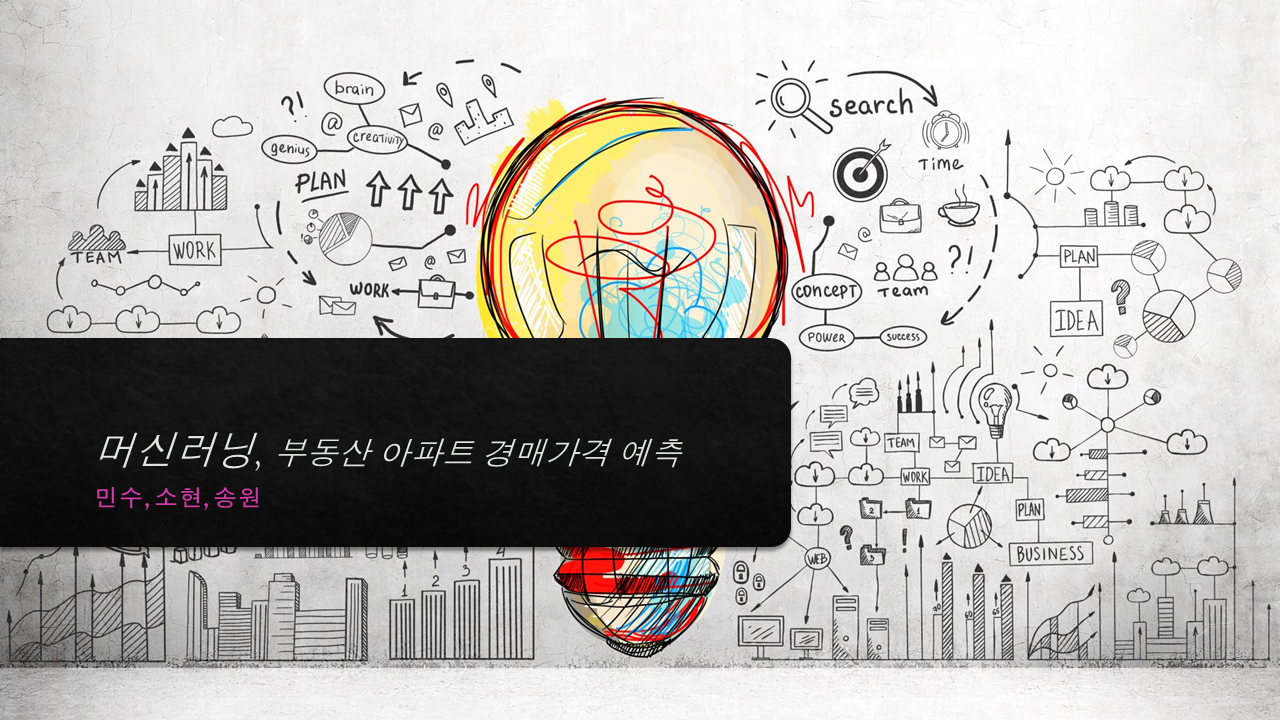

In [ ]:
from IPython.display import Image
Image('발표자료.png')

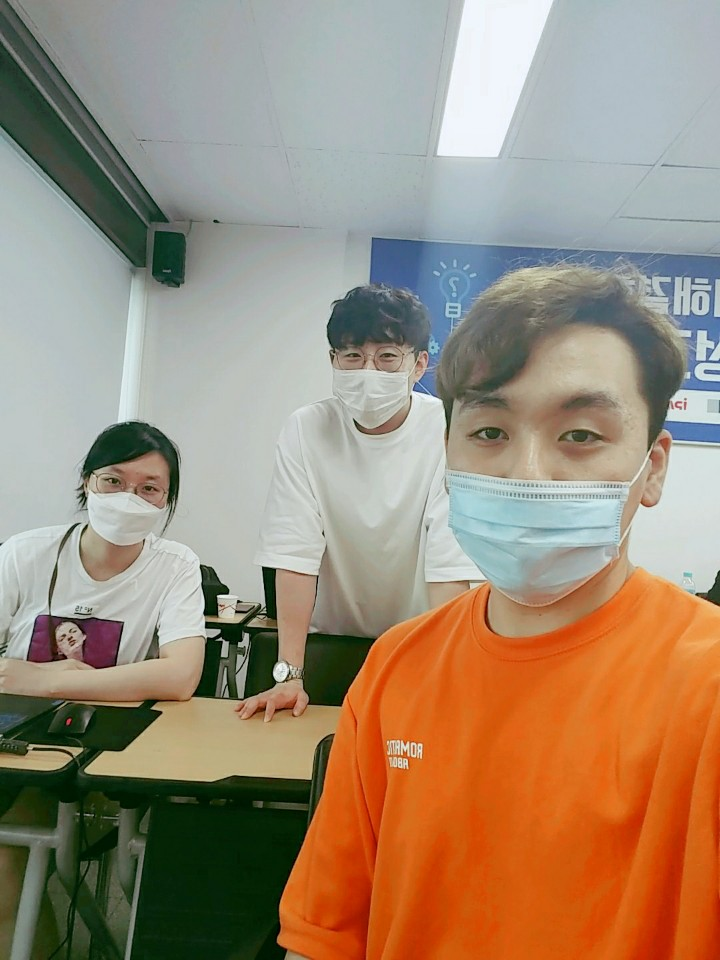

In [ ]:
from IPython.display import Image
Image('민소송.jpg')

# DACON: 아파트 경매가 예측
- 참고: https://eda-ai-lab.tistory.com/13   (EDA 탐색적 데이터 분석 접근방식)
- 링크: https://dacon.io/competitions/official/17801/codeshare/442?page=1&dtype=recent&ptype=pub (데이콘)
___
### 1) files
- Auction_master_train.csv – 서울/부산 지역의 낙찰가를 포함하여 경매 물건 아파트의 위치, 감정가, 경매 개시/종결일 등의 기본 
- Auction_master_test.csv – 경매 낙찰가를 제외하고 train.csv와 동일 
- Auction_submission.csv – 예측한 낙찰가를 기입하여 제출
- Auctiuon_regist.csv – 아파트에 대한 등기 정보
- Auctiuon_result.csv – 경매일자, 감정가, 최저매각가격, 경매 결과 데이터
- Auctiuon_rent.csv - 해당 아파트에 임차인이 있는 경우, 전입/점유 여부, 보증금, 월세 등의 데이터.



In [ ]:
import pandas as pd

In [ ]:
# Auction_master_train.csv
train = pd.read_csv('Auction_master_train.csv')

# test.csv
test = pd.read_csv('Auction_master_test.csv')

# # regist.csv
regist = pd.read_csv('Auction_regist.csv')

# # result.csv
result = pd.read_csv('Auction_result.csv')

# # rent.csv
rent = pd.read_csv('Auction_rent.csv')

In [ ]:
train.corr()['Hammer_price']

Auction_key                   -0.418769
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Total_floor                    0.220830
Current_floor                  0.198013
road_bunji1                    0.020404
road_bunji2                    0.206681
point.y                        0.295698
point.x                       -0.296312
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

In [ ]:
# 결측치 많은 컬럼 제거
train.drop(['addr_li','addr_bunji2','Specific','road_bunji2'], axis=1, inplace=True)

## 날짜 데이터
- First_auction_date 최초경매일
- Final_auction_date 최종경매일
- Preserve_regist_date 보존등기일 (건물을 신축하고 처음으로 등록한 날짜)
- Appraisal_date 감정일자
- Close_date  종국일자
종국결과:
낙찰과 배당의 차이 : 경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 
낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 
법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.

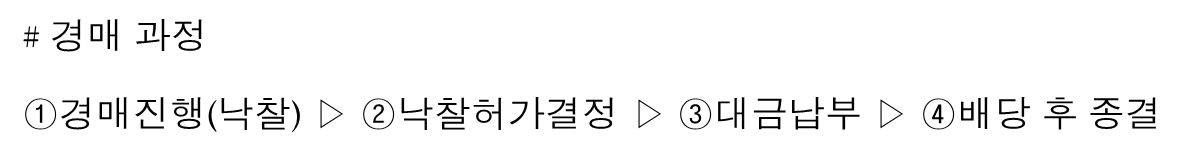

## Price 가격
- Claim_price 경매 신청인의 청구 금액
- Hammer_price 낙찰가 (종속변수)
- Total_appraisal_price (총감정가)
- Minimum_sales_price  최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액


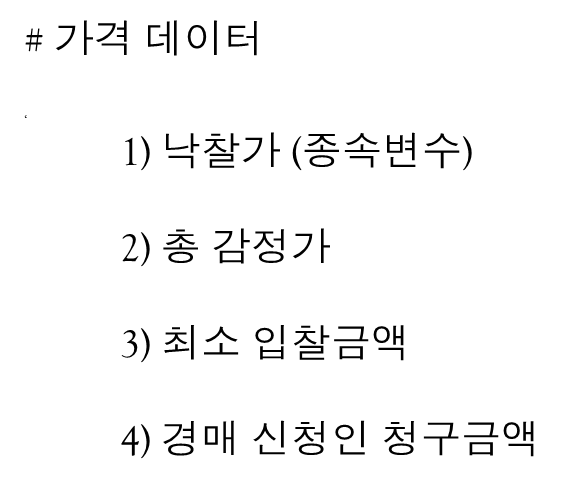

In [ ]:
import numpy as np
trainp = train.copy()
q1 = np.percentile(trainp['Hammer_price'], 25)
q3 = np.percentile(trainp['Hammer_price'], 75)
# 정상범위 (75% - 25%)
IQR = q3 - q1
outliers = trainp[ ( trainp['Hammer_price'] >= q1-(1.5*IQR) ) & ( trainp['Hammer_price'] <= q3 + (1.5*IQR) ) ]
trainp = outliers
trainp = trainp.reset_index()
trainp.drop('index', axis=1, inplace=True)

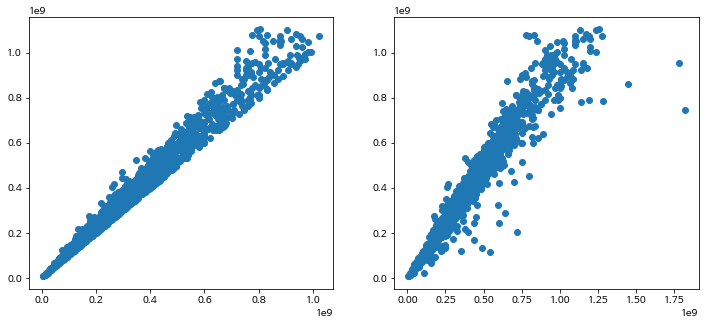

In [ ]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.scatter(trainp['Minimum_sales_price'],trainp['Hammer_price'])
ax2 = fig.add_subplot(1,2,2)
ax2 = plt.scatter(trainp['Total_appraisal_price'],trainp['Hammer_price'])

In [ ]:
train.corr()['Hammer_price']

Auction_key                   -0.418769
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Total_floor                    0.220830
Current_floor                  0.198013
road_bunji1                    0.020404
road_bunji2                    0.206681
point.y                        0.295698
point.x                       -0.296312
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

In [ ]:
# test셋 score
l1_model.score(X_test, y_test)

0.987531445449767

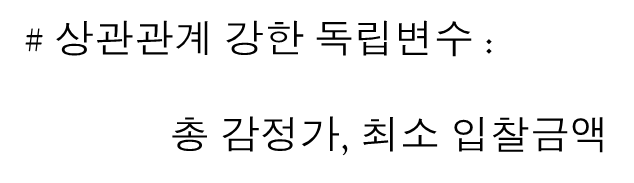

In [ ]:
'''
- Claim_price 경매 신청인의 청구 금액
- Total_appraisal_price (총감정가)
- Minimum_sales_price  최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액
- Hammer_price 낙찰가 (종속변수)
'''
# train[['Auction_key','Claim_price','Total_appraisal_price', 'Minimum_sales_price', 'Hammer_price']]

'\n- Claim_price 경매 신청인의 청구 금액\n- Total_appraisal_price (총감정가)\n- Minimum_sales_price  최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액\n- Hammer_price 낙찰가 (종속변수)\n'

## Categorical_data
Auction_class : 경매구분
- 강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행 
- 임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행

Bid_class : 입찰구분
- 일반
- 개별
- 일괄

Apartment_usage : 건물의 대표 용도
- 아파트
- 주상복합

Share_auction_YorN  지분경매 여부(Y), 하나의 부동산이 전체가 아닌 일부만 경매가 진행 (하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그중 일부 지분만 경매가 진행)
- N (No)
- Y (Yes)

In [ ]:
# train[ ['Auction_key','Auction_class','Bid_class'] ]

In [ ]:
train['Auction_class'].value_counts()

임의    1439
강제     494
Name: Auction_class, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


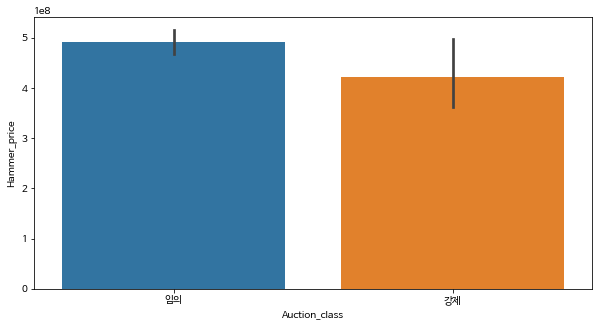

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Auction_class', y='Hammer_price')

In [ ]:
train['Bid_class'].value_counts()

일반    1796
개별     125
일괄      12
Name: Bid_class, dtype: int64

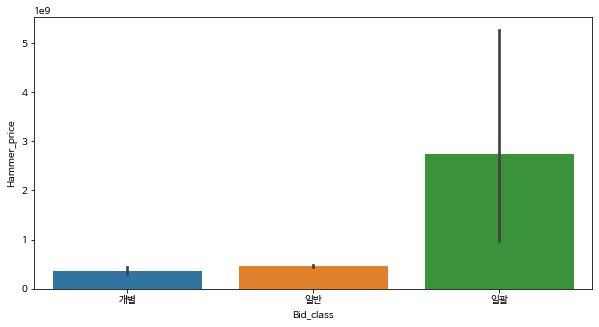

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Bid_class', y='Hammer_price')

In [ ]:
# Apartment_usage  건물(토지)의 대표용도
train['Apartment_usage'].value_counts()

아파트     1656
주상복합     277
Name: Apartment_usage, dtype: int64

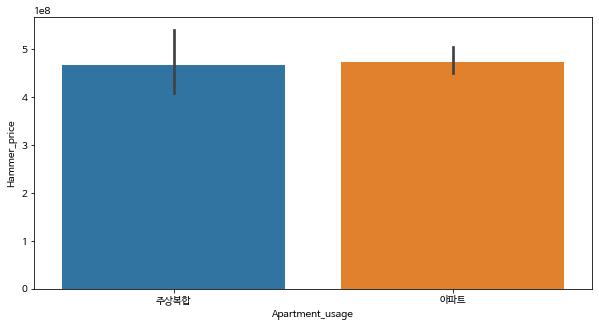

In [ ]:
# 주상복합/아파트 용도는 가격에 별영향이 없는 듯하네
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Apartment_usage', y='Hammer_price')

In [ ]:
# 지분경매여부 컬럼
train['Share_auction_YorN'].value_counts()

N    1854
Y      79
Name: Share_auction_YorN, dtype: int64

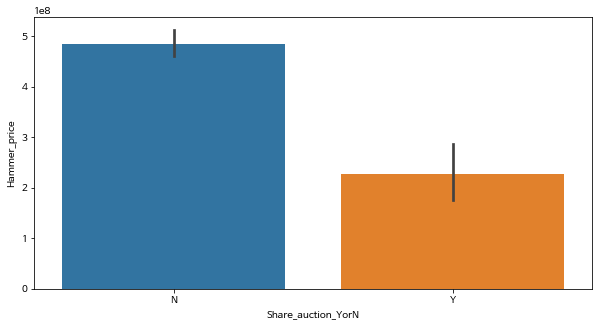

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Share_auction_YorN', y='Hammer_price')

- categorical_number로 캐스팅하기

In [ ]:
# categorical_num 캐스팅   
train['Auction_class'].unique()

array(['임의', '강제'], dtype=object)

In [ ]:
# Auction_class 컬럼 범주형 인덱싱
for i, cla in enumerate(train['Auction_class'].unique()):
  train['Auction_class'].replace(cla, i, inplace=True)
train['Auction_class']

0       0
1       0
2       0
3       0
4       1
       ..
1928    1
1929    0
1930    0
1931    1
1932    0
Name: Auction_class, Length: 1933, dtype: int64

In [ ]:
# 0 = 임의, 1= 강제
train['Auction_class'].value_counts()

0    1439
1     494
Name: Auction_class, dtype: int64

In [ ]:
# Bid_class 컬럼
list(enumerate(train['Bid_class'].unique()))

[(0, '개별'), (1, '일반'), (2, '일괄')]

In [ ]:
# 0=개별, 1=일반, 2=일괄
for i, cla in enumerate(train['Bid_class'].unique()):
  train['Bid_class'].replace(cla, i, inplace=True)
train['Bid_class'].value_counts()

1    1796
0     125
2      12
Name: Bid_class, dtype: int64

In [ ]:
# Apartment_usage 컬럼
list(enumerate(train['Apartment_usage'].unique()))

[(0, '주상복합'), (1, '아파트')]

In [ ]:
# 0 = 주상복합, 1 = 아파트
for i, cla in enumerate(train['Apartment_usage'].unique()):
  train['Apartment_usage'].replace(cla, i, inplace=True)
train['Apartment_usage'].value_counts()

1    1656
0     277
Name: Apartment_usage, dtype: int64

In [ ]:
# Share_auction_YorN 지분경매여부 컬럼
list(enumerate(train['Share_auction_YorN'].unique()))

[(0, 'N'), (1, 'Y')]

In [ ]:
# N = 0, Y = 1
for i, cla in enumerate(train['Share_auction_YorN'].unique()):
  train['Share_auction_YorN'].replace(cla, i, inplace=True)
train['Share_auction_YorN'].value_counts()

0    1854
1      79
Name: Share_auction_YorN, dtype: int64

## 횟수 데이터 : num

- Auction_count : 총 경매 횟수
- Auction_miscarriage_count  총 유찰 횟수

In [ ]:
# 유찰 횟수
train['Auction_miscarriage_count'].value_counts()

1    1088
0     685
2     106
3      26
5      14
6       6
4       6
9       1
7       1
Name: Auction_miscarriage_count, dtype: int64

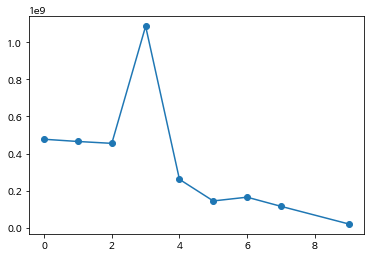

In [ ]:
# 유찰횟수 3번째를 제외하고는 평균 적으로 유찰횟수가 적을수록 높은 예측가를 나타냄
# 3번째는 이상치가 있는 데이터인가?
plt.plot(train.groupby(['Auction_miscarriage_count'])['Hammer_price'].mean(),'-o')

## 면적 데이터
- Total_land_gross_area 총 토지전체 면적   
- Total_land_real_area  총 토지실지 면적   
- Total_land_auction_area 총 토지경매 면적
- Total_building_area
- Total_building_auction_area

## 주소 데이터
- addr_do  주소_시도
- addr_si  주소_시군구
- addr_dong  주소_읍면동
- addr_san  주소_산번지여부(Y)
- addr_bunji1   주소_번지1
- road_bunji1 도로명주소_번지1

In [ ]:
list(enumerate(train['addr_do'].unique()))

[(0, '부산'), (1, '서울')]

In [ ]:
# 서울, 부산 categorical 캐스팅
for i, cla in enumerate(train['addr_do'].unique()):
  train['addr_do'].replace(cla, i, inplace=True)

In [ ]:
train['addr_do'].value_counts()

1    1242
0     691
Name: addr_do, dtype: int64

### Premium 아파트 컬럼 추가

In [ ]:
train['addr_etc']

0                      해운대엑소디움 5층 101-502호
1               해운대두산위브더제니스 103동 51층 5103호
2                      백양그린 206동 14층 1403호
3                      대연청구 109동 11층 1102호
4                            동조리젠시 7층 703호
                       ...                
1928                     삼성 110동 15층 1501호
1929                 상계불암대림 205동 23층 2303호
1930    ,회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호
1931                  삼성래미안 110동 11층 1102호
1932                   강서한강자이 106동 7층 703호
Name: addr_etc, Length: 1933, dtype: object

In [ ]:
# 좋은 아파트 categorical 캐스팅
apart_name = pd.Series(["더샵","자이","아이파크","래미안","힐스테이트","롯데캐슬"])

In [ ]:
apart_name

0       더샵
1       자이
2     아이파크
3      래미안
4    힐스테이트
5     롯데캐슬
dtype: object

In [ ]:
import numpy as np 
def get_apart(str_val, name):
  if name.apply(lambda x: [x in y for y in [str_val]][0]).sum() > 0: # 지정 단어 있으면,
    # return np.asscalar(apart_name.loc[apart_name.apply(lambda x: [x in y for y in [str_val]][0])])]
    return 'P'
  
  else :  # 지정 단어 없으면,
    return 'N'

In [ ]:
train['Premium'] = train.apply(lambda x: get_apart(str_val=x['addr_etc'], name=apart_name), axis=1)

In [ ]:
train['Premium'].value_counts()

N    1772
P     161
Name: Premium, dtype: int64

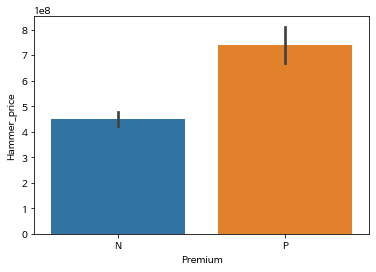

In [ ]:
sns.barplot(data=train, x='Premium', y='Hammer_price')

## 층수 데이터

In [ ]:
# Total_floor 총층수   Current_floor 현재층수
train[['Total_floor','Current_floor','Hammer_price']]

,Total_floor,Current_floor,Hammer_price
0,45,5,760000000
1,70,51,971889999
2,15,14,93399999
3,20,11,256899000
4,7,7,158660000
...,...,...,...
1928,21,15,402500000
1929,23,23,430234600
1930,32,19,1118999990
1931,15,11,403000000


### 층수 비율 Normalize 컬럼 추가

In [ ]:
# floor_ratio 컬럼 생성  현재층수 / 총층수 -> 아파트마다 층이 다르므로, 이를 비교하기위한 normalization 과정
train['floor_ratio'] = (train['Current_floor'] / train['Total_floor']).round(3)
train['floor_ratio']

0       0.111
1       0.729
2       0.933
3       0.550
4       1.000
        ...  
1928    0.714
1929    1.000
1930    0.594
1931    0.733
1932    0.318
Name: floor_ratio, Length: 1933, dtype: float64

In [ ]:
# 층수 비율에 따른 조회
train[ (train['floor_ratio'] >= 0.5) & (train['floor_ratio'] < 0.75) ]['floor_ratio']

1       0.729
3       0.550
7       0.542
12      0.500
24      0.667
        ...  
1925    0.706
1927    0.714
1928    0.714
1930    0.594
1931    0.733
Name: floor_ratio, Length: 473, dtype: float64

In [ ]:
train['floor_ratio'].skew()

0.07668100188564062

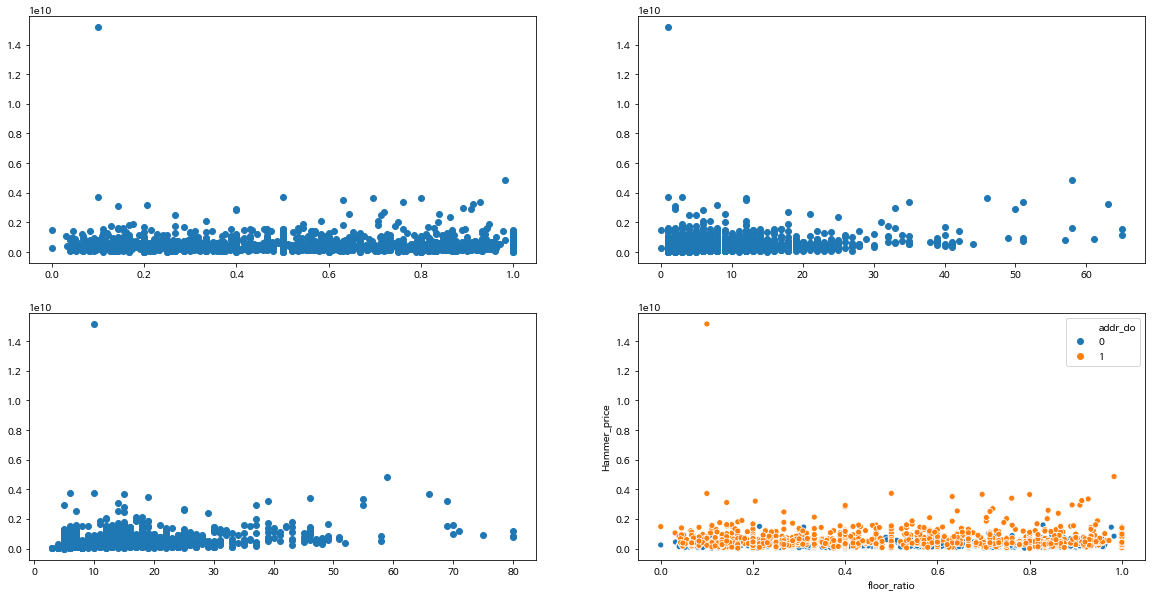

In [ ]:
# 층수 비율에 따른 낙찰가 시각화
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = plt.scatter(train['floor_ratio'],train['Hammer_price'])
ax2 = fig.add_subplot(2,2,2)
ax2 = plt.scatter(train['Current_floor'],train['Hammer_price'])
ax3 = fig.add_subplot(2,2,3)
ax3 = plt.scatter(train['Total_floor'],train['Hammer_price'])
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.scatterplot(data=train, x='floor_ratio', y='Hammer_price', hue='addr_do')

In [ ]:
# train[['floor_ratio','addr_do','addr_si','Total_appraisal_price', 'Hammer_price']]

In [ ]:
# plt.figure(figsize=(20,10))
# plt.plot(train.groupby('addr_si')['Hammer_price'].mean())

## 기타 데이터

In [ ]:
# 배당 -> 대금납부를 완료하여 법원에게 배당을 받음
# 배당을 받지 못한 경우는 경매취소?
train['Close_result'].value_counts()

배당      1921
          12
Name: Close_result, dtype: int64

In [ ]:
list(enumerate(train['Close_result'].unique()))

[(0, '배당'), (1, '    ')]

In [ ]:
# 배당 = 0  배당x = 1 categorical 캐스팅
for i, cla in enumerate(train['Close_result'].unique()):
  train['Close_result'].replace(cla, i, inplace=True)
train['Close_result'].value_counts()


0    1921
1      12
Name: Close_result, dtype: int64

In [ ]:
# 배당 실패한 인덱스 조회
train[train['Close_result']==1].index

Int64Index([962, 1016, 1026, 1040, 1146, 1407, 1438, 1627, 1640, 1665, 1867,
            1924],
           dtype='int64')

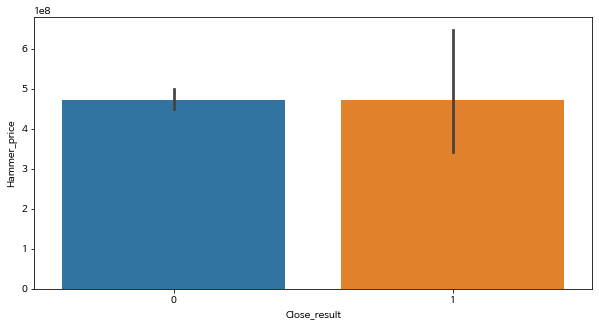

In [ ]:
# 배당이 실패한 경우, 가격하락?
plt.figure(figsize=(10, 5))
sns.barplot(data=train, x='Close_result', y='Hammer_price')

# 데이터 정규화 전처리
- https://hong-yp-ml-records.tistory.com/28 
- https://m.blog.naver.com/PostView.nhn?blogId=s2ak74&logNo=220616766539&proxyReferer=https:%2F%2Fwww.google.com%2F (개념정리)

- 변수들의 분포를 살펴보고 정규화를 시켜주어야 보다 정확한 분석 결과를 얻음!
(너무 심한 왜도와 첨도를 지니는 경우 log를 취함)

- 왜도(Skewness) : 왜도는 분포의 비대칭도를 나타내는 통계량 / 첨도(kurtosis) : 첨도는 분포의 꼬리부분의 길이와 중앙부분의 뾰족함에 대한 정보를 제공하는 통계량


### 1) 면적 데이터 정규화

In [ ]:
train.skew()

Auction_key                    -0.005705
Auction_class                   1.121696
Bid_class                      -2.652043
Claim_price                    14.051256
Auction_count                   3.371959
Auction_miscarriage_count       2.730221
Total_land_gross_area          26.584329
Total_land_real_area           34.023623
Total_land_auction_area        33.892241
Total_building_area            31.644204
Total_building_auction_area    31.234728
Total_appraisal_price          22.467161
Minimum_sales_price            12.332838
addr_do                        -0.595236
addr_bunji1                     2.180236
Apartment_usage                -2.037659
Total_floor                     1.977065
Current_floor                   2.425969
Share_auction_YorN              4.641594
road_bunji1                     3.349938
Close_result                   12.583134
point.y                        -0.592655
point.x                         0.585114
Hammer_price                   11.178607
floor_ratio     

In [ ]:
# 범주형, 숫자형 타입 확인
numerical_feats = train.dtypes[train.dtypes != 'object'].index
categorical_feats = train.dtypes[train.dtypes == 'object'].index
print('numeric:', len(numerical_feats))
print('categoric:', len(categorical_feats))

numeric: 25
categoric: 14


In [ ]:
for num in numerical_feats:
  # print('{:15}'.format(num), 'Skewness:{:05.2f}'.format(train[num].skew()))
  print('{:30}'.format(num), train[num].skew())

Auction_key                    -0.005705471692314156
Auction_class                  1.1216959488183216
Bid_class                      -2.6520428077103966
Claim_price                    14.051256256126905
Auction_count                  3.371959071037289
Auction_miscarriage_count      2.7302212278181353
Total_land_gross_area          26.584328664207206
Total_land_real_area           34.02362340005757
Total_land_auction_area        33.89224111321977
Total_building_area            31.644203802129745
Total_building_auction_area    31.234727589384967
Total_appraisal_price          22.467160691259043
Minimum_sales_price            12.332838282978049
addr_do                        -0.5952357285757874
addr_bunji1                    2.1802359183580977
Apartment_usage                -2.037658637074482
Total_floor                    1.9770652156202895
Current_floor                  2.425968606312821
Share_auction_YorN             4.6415941181217235
road_bunji1                    3.3499384379232686

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- Total_land_gross_area 총 토지전체 면적   
- Total_land_real_area  총 토지실지 면적   
- Total_land_auction_area 총 토지경매 면적

총 토지실지 면적 Skewness: 34.024
총 토지실지 면적 Kurtosis: 1354.818
총 토지경매 면적 Skewness: 34.024
총 토지경매 면적 Kurtosis: 1354.818


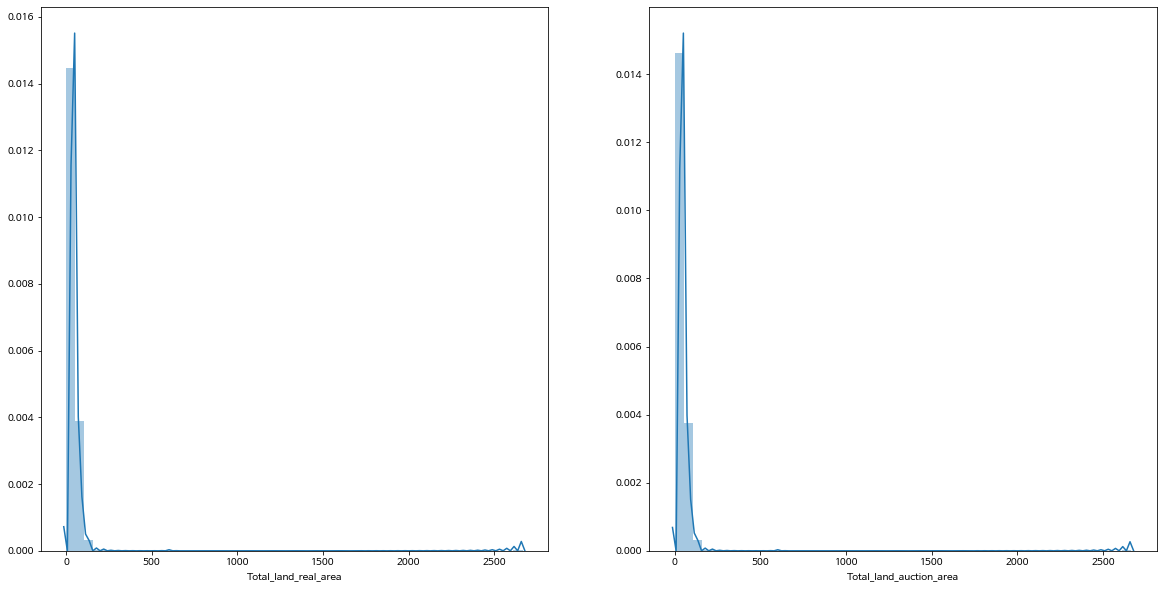

In [ ]:
# skewness가 가장 높은 Total_land_real_area
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.distplot(train['Total_land_real_area'])
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.distplot(train['Total_land_auction_area'])
print("총 토지실지 면적 Skewness: {:.3f}".format(train["Total_land_real_area"].skew()))
print("총 토지실지 면적 Kurtosis: {:.3f}".format(train["Total_land_real_area"].kurt()))
print('='*100)
print("총 토지경매 면적 Skewness: {:.3f}".format(train["Total_land_real_area"].skew()))
print("총 토지경매 면적 Kurtosis: {:.3f}".format(train["Total_land_real_area"].kurt()))

In [ ]:
# 정규화를 위한 log를 취함
train['log_land_real_area'] = np.log1p(train['Total_land_real_area'])
train['log_land_auction_area'] = np.log1p(train['Total_land_auction_area'])

In [ ]:
# round() 통한 부동소수점 처리
# round(train[''])

log_land_real_area Skewness: -2.135
log_land_real_area Kurtosis: 8.433
log_land_auction_area: -2.135
log_land_auction_area: 8.433


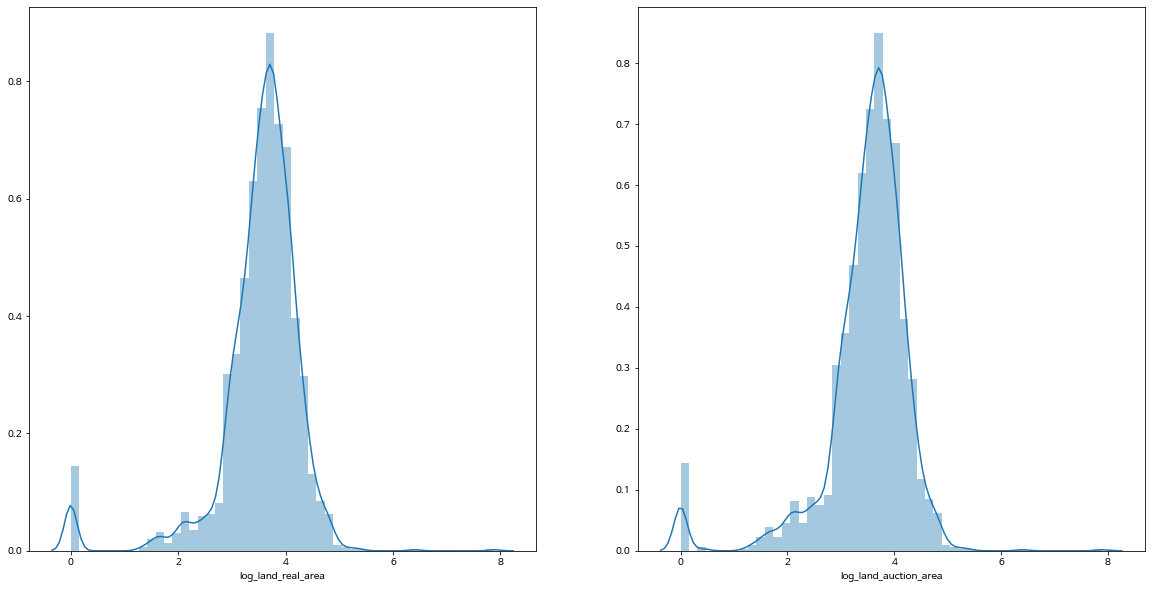

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.distplot(train['log_land_real_area'])
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.distplot(train['log_land_auction_area'])
print("log_land_real_area Skewness: {:.3f}".format(train["log_land_real_area"].skew()))
print("log_land_real_area Kurtosis: {:.3f}".format(train["log_land_real_area"].kurt()))
print('='*100)
print("log_land_auction_area: {:.3f}".format(train["log_land_real_area"].skew()))
print("log_land_auction_area: {:.3f}".format(train["log_land_real_area"].kurt()))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


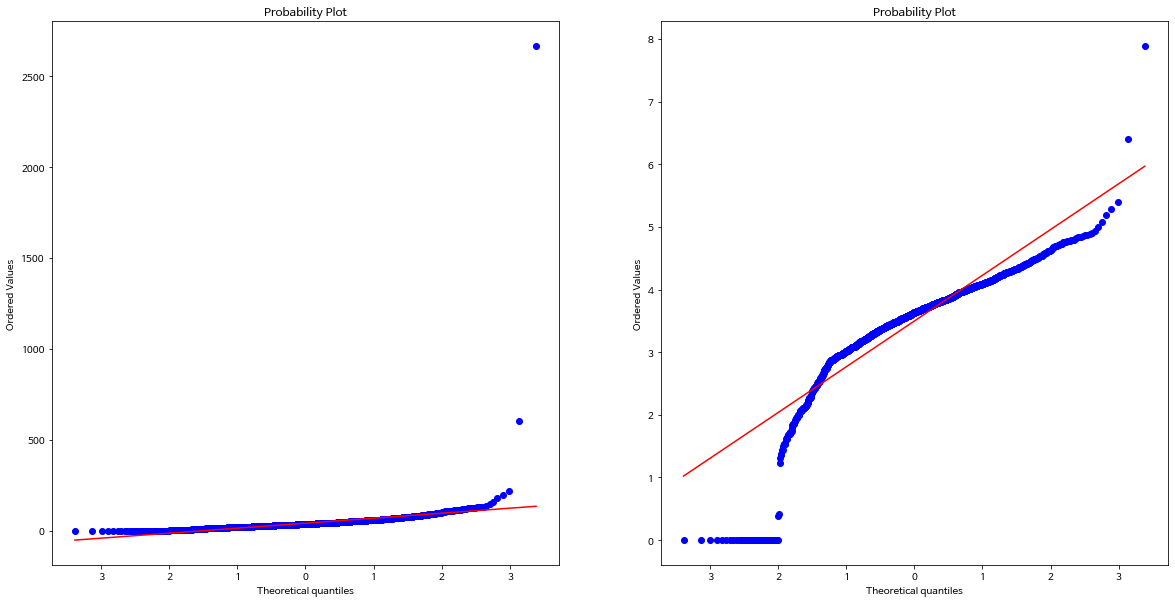

In [ ]:
from scipy import stats
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1 = stats.probplot(train['Total_land_real_area'], plot=plt)
ax2 = fig.add_subplot(1,2,2)
ax2 = stats.probplot(train['log_land_auction_area'], plot=plt)

In [ ]:
# Total_land_gross_area 총 토지전체 면적 

총 토지전체 면적 Skewness: 26.584
총 토지전체 면적 Kurtosis: 955.782


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


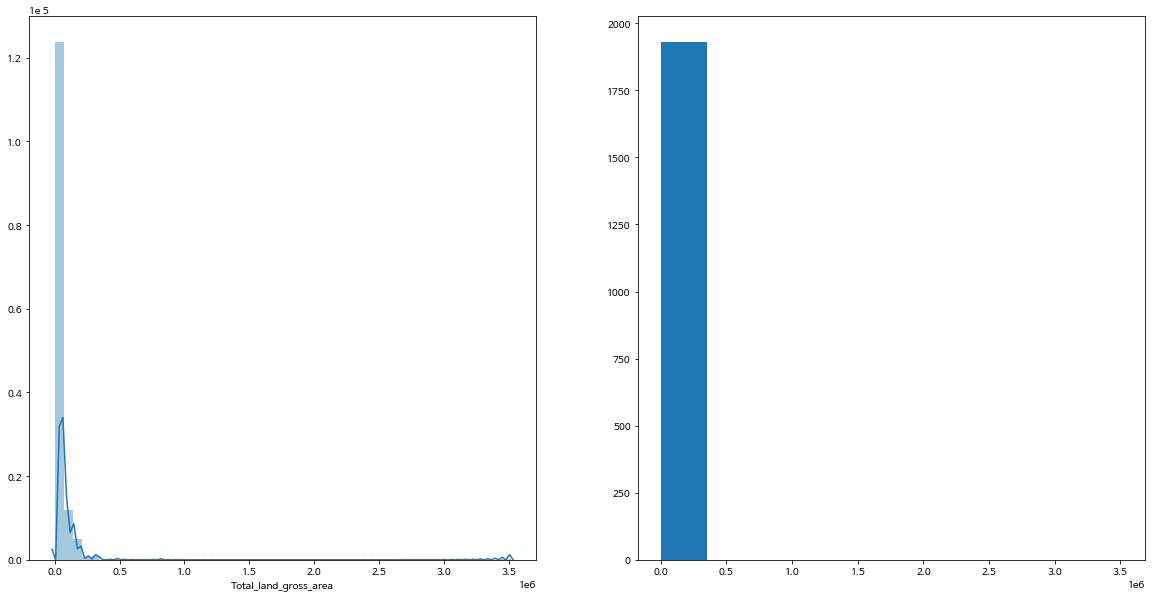

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.distplot(train['Total_land_gross_area'])
ax2 = fig.add_subplot(1,2,2)
ax2 = plt.hist(train['Total_land_gross_area'])
print("총 토지전체 면적 Skewness: {:.3f}".format(train["Total_land_gross_area"].skew()))
print("총 토지전체 면적 Kurtosis: {:.3f}".format(train["Total_land_gross_area"].kurt()))

In [ ]:
# log 취한 값 log_land_gross_area 컬럼생성
train['log_land_gross_area'] = np.log1p(train['Total_land_gross_area'])

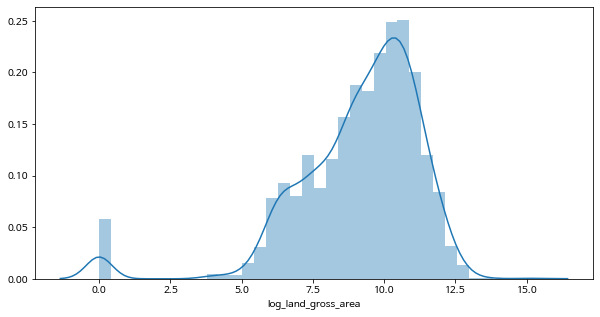

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(train['log_land_gross_area'])

총 토지전체 면적 Skewness: -1.695
log_land_real_area Kurtosis: 8.433


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


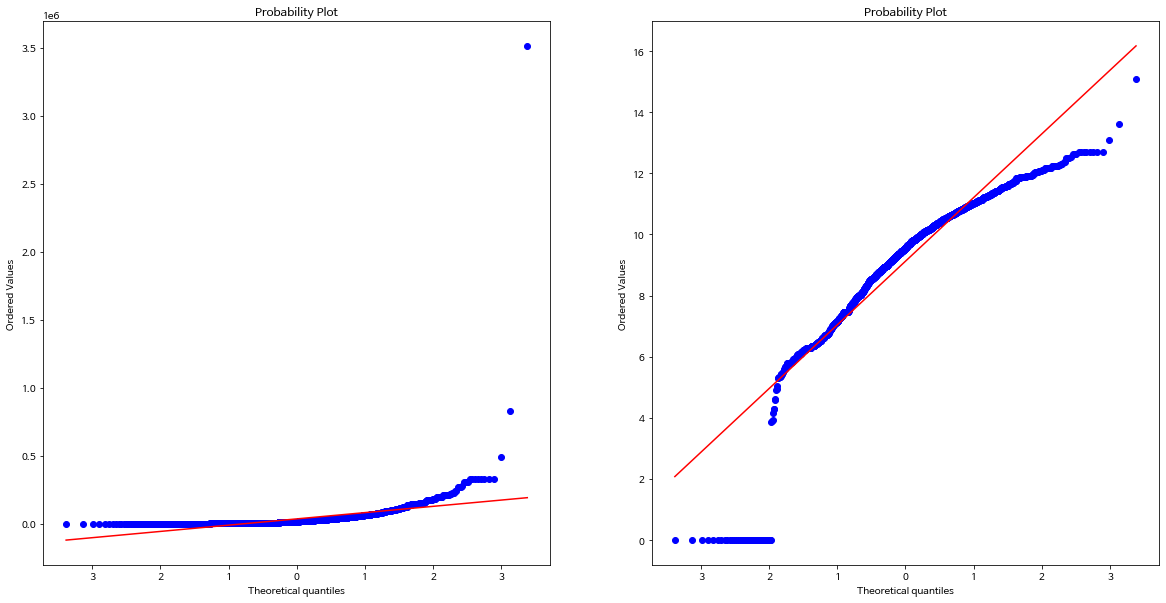

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1 = stats.probplot(train['Total_land_gross_area'], plot=plt)
ax2 = fig.add_subplot(1,2,2)
ax2 = stats.probplot(train['log_land_gross_area'], plot=plt)
print("총 토지전체 면적 Skewness: {:.3f}".format(train["log_land_gross_area"].skew()))
print("log_land_real_area Kurtosis: {:.3f}".format(train["log_land_real_area"].kurt()))

In [ ]:
train.skew().sort_values()

Bid_class                      -2.652043
log_land_real_area             -2.135434
Apartment_usage                -2.037659
log_land_auction_area          -1.967766
log_land_gross_area            -1.694864
addr_do                        -0.595236
point.y                        -0.592655
Auction_key                    -0.005705
floor_ratio                     0.076681
point.x                         0.585114
Auction_class                   1.121696
Total_floor                     1.977065
addr_bunji1                     2.180236
Current_floor                   2.425969
Auction_miscarriage_count       2.730221
road_bunji1                     3.349938
Auction_count                   3.371959
Share_auction_YorN              4.641594
Hammer_price                   11.178607
Minimum_sales_price            12.332838
Close_result                   12.583134
Claim_price                    14.051256
Total_appraisal_price          22.467161
Total_land_gross_area          26.584329
Total_building_a

In [ ]:
'''log 취함
Total_building_area            31.644204
Total_building_auction_area    31.234728
'''
train['log_building_area'] = np.log1p(train['Total_building_area'])
train['log_building_auction_area'] = np.log1p(train['Total_building_auction_area'])

 Skewness: 31.644
log Skewness: -0.089


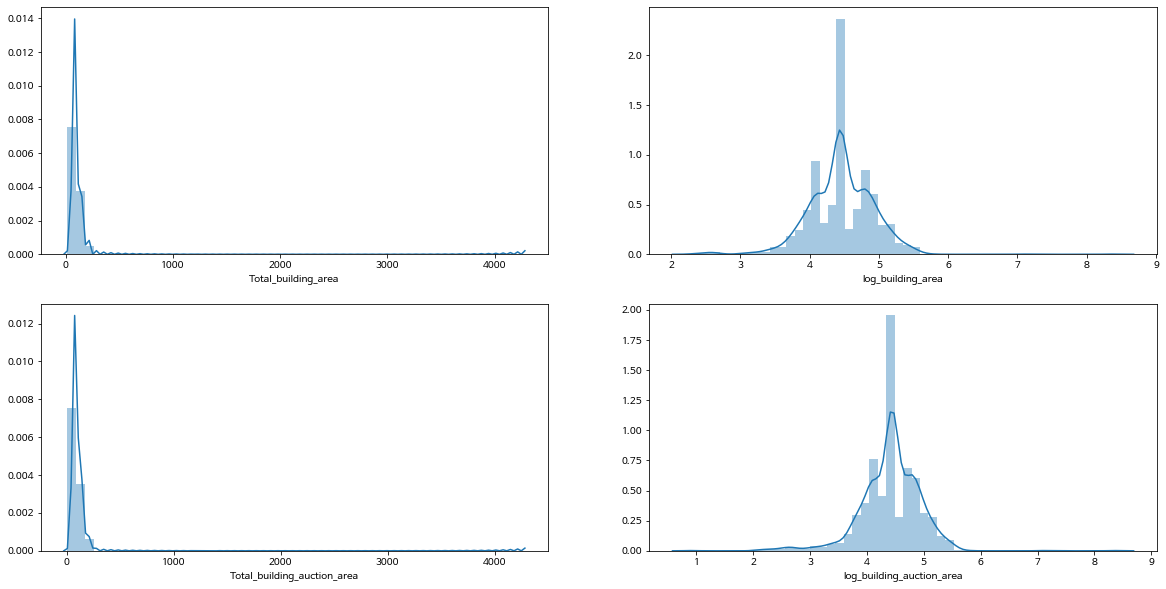

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train['Total_building_area'])
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train['log_building_area'])
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train['Total_building_auction_area'])
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train['log_building_auction_area'])
print(" Skewness: {:.3f}".format(train["Total_building_area"].skew()))
print("log Skewness: {:.3f}".format(train["log_building_area"].skew()))

In [ ]:
# Total_면적 drop
'''
Total_land_gross_area 총 토지전체 면적
Total_land_real_area 총 토지실지 면적
Total_land_auction_area 총 토지경매 면적
Total_building_auction_area    
Total_building_area
'''
train.drop(['Total_land_gross_area',
            'Total_land_real_area',
            'Total_land_auction_area',
            'Total_building_auction_area',
            'Total_building_area'], axis=1, inplace=True)

## 2) 가격 데이터 전처리

In [ ]:
train.corr()['Hammer_price'].sort_values()

Auction_key                 -0.418769
point.x                     -0.296312
Share_auction_YorN          -0.091157
Auction_class               -0.054813
Auction_count               -0.016999
Auction_miscarriage_count   -0.011296
addr_bunji1                 -0.003139
Close_result                -0.000158
Apartment_usage              0.004344
floor_ratio                  0.008572
road_bunji1                  0.020404
log_land_gross_area          0.061069
Bid_class                    0.145528
Current_floor                0.198013
Total_floor                  0.220830
Claim_price                  0.267728
point.y                      0.295698
log_land_real_area           0.304114
addr_do                      0.306488
log_land_auction_area        0.321066
log_building_auction_area    0.557757
log_building_area            0.581169
Total_appraisal_price        0.953464
Minimum_sales_price          0.994592
Hammer_price                 1.000000
Name: Hammer_price, dtype: float64

In [ ]:
'''
위에 상관관계를 보다시피 종속변수 Hammer_price 자체가 절대값이 높으며
그에따라 정규화를 위해 log를 취해준 컬럼의 영향력은 그에비해서 떨어짐
종속변수인 Hammer_Price를 버리고 가장 상관관계가 강하게 나타나는 
Minimum_sales_price와 나눈 비율을 넣는다.
'''
train['Hammer_price'] / train['Minimum_sales_price']

0       1.136364
1       1.132211
2       1.226366
3       1.113467
4       1.166618
          ...   
1928    1.003741
1929    1.184567
1930    1.088521
1931    1.237715
1932    1.143350
Length: 1933, dtype: float64

In [ ]:
# 새로운 종속변수 컬럼 생성
train['target_ratio'] = train['Hammer_price'] / train['Minimum_sales_price']

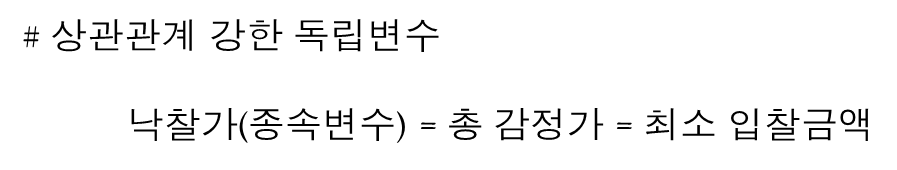

In [ ]:
'''
예측에 도움이 될수 있는 총감정가와 최저입찰금액을 나눈 비율을 추가함

만약 상관관계가 강한 총감정가와 최저입찰금액을 나눈비율은 할인 비율의 개념을 갖게됨
'''
train['Minimum_sales_price'] / train['Total_appraisal_price']

0       0.80
1       0.80
2       0.64
3       0.80
4       0.80
        ... 
1928    1.00
1929    0.80
1930    0.80
1931    0.80
1932    0.80
Length: 1933, dtype: float64

In [ ]:
train['Appraisal_minimum'] = train['Minimum_sales_price'] / train['Total_appraisal_price']

In [ ]:
train['Appraisal_minimum'].value_counts()

0.800000    1100
1.000000     685
0.640000      98
0.512000      22
0.512001       5
0.409600       4
0.512001       3
0.327680       2
0.409599       2
0.409599       2
0.209715       1
0.512000       1
0.409601       1
0.512001       1
0.262144       1
0.134218       1
0.512001       1
0.327680       1
0.512001       1
0.262144       1
Name: Appraisal_minimum, dtype: int64

In [ ]:
train['Minimum_sales_price'] / train['Claim_price']

0       0.378701
1       5.612407
2       6.724048
3       1.256770
4       2.963759
          ...   
1928    1.432143
1929    1.816000
1930    2.897362
1931    4.070000
1932    3.333333
Length: 1933, dtype: float64

In [ ]:
'''
경매 신청인이 제시하는 금액과 최소 입찰금액을 나눈 컬럼
'Minimum_sales_price' / 'Claim_price' 컬럼 생성
'''
train['Claim_minimum'] = train['Minimum_sales_price'] / train['Claim_price']

In [ ]:
train['Claim_minimum'].value_counts()

inf         14
4.320000     5
0.107744     5
3.333333     4
1.400000     3
            ..
1.196078     1
1.400493     1
1.214935     1
1.797993     1
1.875000     1
Name: Claim_minimum, Length: 1855, dtype: int64

In [ ]:
'''
Hammer_price와 영향력이 두번째로 높았던 총감정가와 나눈 결과
종속변수를 
'''
# train['Hammer_price'] / train['Total_appraisal_price']

'\nHammer_price와 영향력이 두번째로 높았던 총감정가와 나눈 결과\n종속변수를 \n'

In [ ]:
# train['target_apraisal'] = train['Hammer_price'] / train['Total_appraisal_price']

In [ ]:
# target_ratio의 상관관계가 너무 낮은데...
train.corr()['target_ratio'].sort_values()

Appraisal_minimum           -0.468699
Auction_key                 -0.062281
Current_floor               -0.055320
Total_floor                 -0.051261
Minimum_sales_price         -0.043354
point.x                     -0.039228
road_bunji1                 -0.021403
Share_auction_YorN          -0.019693
floor_ratio                 -0.016020
Auction_class               -0.009071
Claim_minimum               -0.001602
Total_appraisal_price       -0.000727
log_land_gross_area          0.004592
Bid_class                    0.012462
addr_bunji1                  0.013124
Close_result                 0.015684
log_building_auction_area    0.022075
Hammer_price                 0.030511
log_building_area            0.030705
point.y                      0.038030
addr_do                      0.040029
log_land_auction_area        0.044490
log_land_real_area           0.049249
Apartment_usage              0.061123
Claim_price                  0.100713
Auction_count                0.354610
Auction_misc

In [ ]:
train.corr()['Hammer_price'].sort_values()

Auction_key                 -0.418769
point.x                     -0.296312
Share_auction_YorN          -0.091157
Auction_class               -0.054813
Auction_count               -0.016999
Auction_miscarriage_count   -0.011296
Appraisal_minimum           -0.004514
addr_bunji1                 -0.003139
Close_result                -0.000158
Apartment_usage              0.004344
Claim_minimum                0.006944
floor_ratio                  0.008572
road_bunji1                  0.020404
target_ratio                 0.030511
log_land_gross_area          0.061069
Bid_class                    0.145528
Current_floor                0.198013
Total_floor                  0.220830
Claim_price                  0.267728
point.y                      0.295698
log_land_real_area           0.304114
addr_do                      0.306488
log_land_auction_area        0.321066
log_building_auction_area    0.557757
log_building_area            0.581169
Total_appraisal_price        0.953464
Minimum_sale

In [ ]:
# 가격 실제값 drop
# train.drop(['Claim_price','Total_appraisal_price','Minimum_sales_price'],axis=1,inplace=True)

# Minimum_sales_price의 경우는 종속변수와 가장 강한 영향력이므로 일단 삭제 보류
train.drop(['Claim_price','Total_appraisal_price'],axis=1,inplace=True)

In [ ]:
# 상관관계
# plt.figure(figsize=(20,10))
# sns.heatmap(train.corr(), annot=True, cmap="RdBu")

# 컬럼 변경/추가
컬럼 변경)
- log_land_gross_area log(총 토지전체 면적)   
- log_land_real_area  log(총 토지실지 면적)   
- log_land_auction_area log(총 토지경매 면적)
- log_building_area            
- log_building_auction_area
____
새로운 컬럼 추가)
- floor_ratio (고층비율) = 현재 층수 / 총 층수
- miscount_ratio(유찰 비율) = 유찰 횟수 / 총 경매 횟수  Auction_miscarriage_count / Auction_count
- Auction_days(경매기간) = 최초경매일 - 최종경매일
- Payment_days(대금납부기간) = 종국일자 - 최종경매일

### 1) miscount_ratio (유찰비율) 컬럼 생성

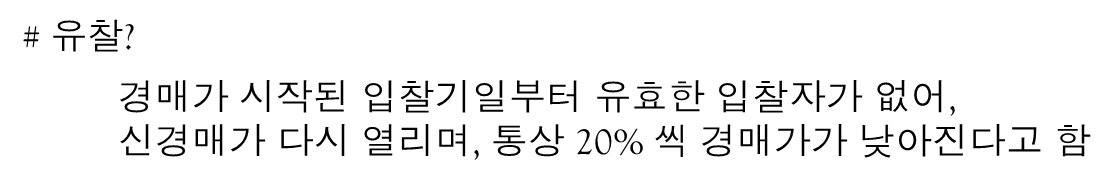

In [ ]:
# miscount_ratio (유찰비율) 컬럼 생성 (의미없나?!)
train['miscount_ratio'] = train['Auction_miscarriage_count'] / train['Auction_count']

In [ ]:
# 'miscount_ratio' 컬럼 확인
train[train['Auction_key'] == 2687]['miscount_ratio']

0    0.5
Name: miscount_ratio, dtype: float64

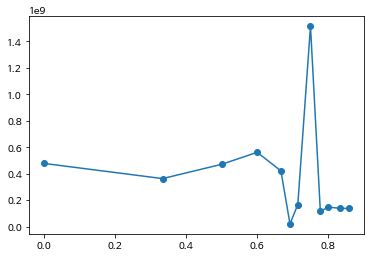

In [ ]:
plt.plot(train.groupby(['miscount_ratio'])['Hammer_price'].mean(),'-o')

In [ ]:
# 기존 횟수 데이터 drop
train.drop(['Auction_miscarriage_count','Auction_count'], axis=1, inplace=True)

### 2) 대금납부기간 Payment_days 컬럼 생성
- 대금납부기간 = 종국일자 - 최종경매일자

In [ ]:
# 최종경매일자, 종국일자 split() 통해 날짜와 시간을나눔
train['Close_date'] = train['Close_date'].apply(lambda x: x.split())
train['Final_auction_date'] = train['Final_auction_date'].apply(lambda x: x.split())

In [ ]:
from datetime import datetime
# 최종경매일자, 종국일자 timestamp로 변형
train['Close_date'] = train['Close_date'].apply(lambda x: datetime.strptime(x[0], '%Y-%m-%d'))
train['Final_auction_date'] = train['Final_auction_date'].apply(lambda x: datetime.strptime(x[0], '%Y-%m-%d'))

In [ ]:
# 종국일자 
train['Close_date']

0       2018-06-14 00:00:00
1       2017-03-30 00:00:00
2       2017-12-13 00:00:00
3       2017-12-27 00:00:00
4       2016-10-04 00:00:00
               ...         
1928    2017-08-30 00:00:00
1929    2017-05-24 00:00:00
1930    2018-03-29 00:00:00
1931    2017-01-24 00:00:00
1932    2016-08-25 00:00:00
Name: Close_date, Length: 1933, dtype: object

In [ ]:
train['Final_auction_date']

0      2018-03-20
1      2017-02-02
2      2017-10-13
3      2017-11-02
4      2016-08-03
          ...    
1928   2017-06-19
1929   2017-03-13
1930   2018-01-18
1931   2016-11-14
1932   2016-05-25
Name: Final_auction_date, Length: 1933, dtype: datetime64[ns]

In [ ]:
train.loc[:,'Close_date']

0       2018-06-14 00:00:00
1       2017-03-30 00:00:00
2       2017-12-13 00:00:00
3       2017-12-27 00:00:00
4       2016-10-04 00:00:00
               ...         
1928    2017-08-30 00:00:00
1929    2017-05-24 00:00:00
1930    2018-03-29 00:00:00
1931    2017-01-24 00:00:00
1932    2016-08-25 00:00:00
Name: Close_date, Length: 1933, dtype: object

In [ ]:
train.loc[:,'Close_date'][0]

datetime.datetime(2018, 6, 14, 0, 0)

- Close_date 종국일자 전처리

In [ ]:
train['Close_date'].loc[0]

Timestamp('2018-06-14 00:00:00')

In [ ]:
# datetime.strptime(train['Close_date'].loc[0][0], '%Y-%m-%d')

In [ ]:
# 배당 결과 배당받지 못한 인덱스 출력
'''
배당받지 못했으니 당연히 종국일자가 없는것!
'''
train[train['Close_result'] == 1].index

Int64Index([962, 1016, 1026, 1040, 1146, 1407, 1438, 1627, 1640, 1665, 1867,
            1924],
           dtype='int64')

In [ ]:
# 종국일자 전처리
'''
배당받지 못한 인덱스는 제외하고 datetime 타입으로 변경
'''
# 배당받지 못한 인덱스 입력
not_close_idx = train[train['Close_result'] == 1].index

# train.loc[not_close_idx]['Close_date'].index   <- 요렇게도 인덱스가 출력됨

# 배당받지 못한 datetime 조회
train.loc[not_close_idx]['Close_date']

962     1111-11-11 00:00:00
1016    1111-11-11 00:00:00
1026    1111-11-11 00:00:00
1040    1111-11-11 00:00:00
1146    1111-11-11 00:00:00
1407    1111-11-11 00:00:00
1438    1111-11-11 00:00:00
1627    1111-11-11 00:00:00
1640    1111-11-11 00:00:00
1665    1111-11-11 00:00:00
1867    1111-11-11 00:00:00
1924    1111-11-11 00:00:00
Name: Close_date, dtype: object

In [ ]:
# 종국일자가 없는 인덱스에서 최종 경매일
train.loc[not_close_idx]['Final_auction_date']

962    2016-04-05
1016   2016-10-11
1026   2017-11-07
1040   2017-09-20
1146   2018-02-06
1407   2018-03-05
1438   2018-03-05
1627   2017-06-28
1640   2017-11-06
1665   2017-10-16
1867   2017-12-11
1924   2017-09-18
Name: Final_auction_date, dtype: datetime64[ns]

In [ ]:
# 임시적으로 배당받지못한 날짜에 0값 넣기
train.loc[not_close_idx, 'Close_date'] = 0

In [ ]:
train.loc[train['Close_date']!=0, 'Close_date']

0       2018-06-14 00:00:00
1       2017-03-30 00:00:00
2       2017-12-13 00:00:00
3       2017-12-27 00:00:00
4       2016-10-04 00:00:00
               ...         
1928    2017-08-30 00:00:00
1929    2017-05-24 00:00:00
1930    2018-03-29 00:00:00
1931    2017-01-24 00:00:00
1932    2016-08-25 00:00:00
Name: Close_date, Length: 1921, dtype: object

In [ ]:
train.loc[train['Close_date']!=0, 'Close_date'][0]

datetime.datetime(2018, 6, 14, 0, 0)

In [ ]:
train.loc[train['Close_date']!=0, 'Close_date'][0].year

2018

In [ ]:
close_date = train.loc[train['Close_date']!=0, 'Close_date']

In [ ]:
# for loop를 위한 인덱스 출력
train.loc[train['Close_date']!=0, 'Close_date'].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932],
           dtype='int64', length=1921)

In [ ]:
not_date = train.loc[train['Close_date']!=0, 'Close_date'].index

In [ ]:
# Close_date 컬럼에서 배당받지못한 인덱스 제외하고,
for i in not_date:
  train.loc[i, 'Close_date'] = str(close_date[i].year) + '-' + str(close_date[i].month) + '-' + str(close_date[i].day)
train['Close_date']

0        2018-6-14
1        2017-3-30
2       2017-12-13
3       2017-12-27
4        2016-10-4
           ...    
1928     2017-8-30
1929     2017-5-24
1930     2018-3-29
1931     2017-1-24
1932     2016-8-25
Name: Close_date, Length: 1933, dtype: object

In [ ]:
# 반대로 0값을 넣어줬던 날짜에도 날짜 넣어주기
date = train.loc[train['Close_date']==0, 'Close_date'].index
date

Int64Index([962, 1016, 1026, 1040, 1146, 1407, 1438, 1627, 1640, 1665, 1867,
            1924],
           dtype='int64')

In [ ]:
# 배당받지 못한 Close_date 컬럼에 임시적으로 최종경매일자 넣기 위해서 조회
train.loc[train['Close_date']==0, 'Final_auction_date']

962    2016-04-05
1016   2016-10-11
1026   2017-11-07
1040   2017-09-20
1146   2018-02-06
1407   2018-03-05
1438   2018-03-05
1627   2017-06-28
1640   2017-11-06
1665   2017-10-16
1867   2017-12-11
1924   2017-09-18
Name: Final_auction_date, dtype: datetime64[ns]

In [ ]:
final_date = train.loc[train['Close_date']==0, 'Final_auction_date']

In [ ]:
# final_date[980].year

In [ ]:
# final_date[980].month

In [ ]:
# for loop를 통해 종국일자 값대입
for i in date:
  train.loc[i, 'Close_date'] = str(final_date[i].year) + '-' + str(final_date[i].month) + '-' + str(final_date[i].day)

In [ ]:
train.loc[980, 'Close_date']

'2018-4-12'

In [ ]:
train['Close_date']

0        2018-6-14
1        2017-3-30
2       2017-12-13
3       2017-12-27
4        2016-10-4
           ...    
1928     2017-8-30
1929     2017-5-24
1930     2018-3-29
1931     2017-1-24
1932     2016-8-25
Name: Close_date, Length: 1933, dtype: object

In [ ]:
train['Close_date'].isnull().sum()

0

In [ ]:
# 다시, 종국일자 datetime 타입으로 변형하기
train['Close_date'] = train['Close_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
# datetime 타입 확인
train['Close_date']

0      2018-06-14
1      2017-03-30
2      2017-12-13
3      2017-12-27
4      2016-10-04
          ...    
1928   2017-08-30
1929   2017-05-24
1930   2018-03-29
1931   2017-01-24
1932   2016-08-25
Name: Close_date, Length: 1933, dtype: datetime64[ns]

In [ ]:
train.loc[962, 'Close_date']

Timestamp('2016-04-05 00:00:00')

In [ ]:
train['Payment_days'] = train['Close_date'] - train['Final_auction_date']

In [ ]:
train['Payment_days']

0      86 days
1      56 days
2      61 days
3      55 days
4      62 days
         ...  
1928   72 days
1929   72 days
1930   70 days
1931   71 days
1932   92 days
Name: Payment_days, Length: 1933, dtype: timedelta64[ns]

In [ ]:
train.loc[not_close_idx, 'Payment_days']

962    0 days
1016   0 days
1026   0 days
1040   0 days
1146   0 days
1407   0 days
1438   0 days
1627   0 days
1640   0 days
1665   0 days
1867   0 days
1924   0 days
Name: Payment_days, dtype: timedelta64[ns]

In [ ]:
# datetime 타입 변형
train['Payment_days'] = train['Payment_days'].dt.days

In [ ]:
train['Payment_days']

0       86
1       56
2       61
3       55
4       62
        ..
1928    72
1929    72
1930    70
1931    71
1932    92
Name: Payment_days, Length: 1933, dtype: int64

In [ ]:
train.loc[not_close_idx,'Payment_days']

962     0
1016    0
1026    0
1040    0
1146    0
1407    0
1438    0
1627    0
1640    0
1665    0
1867    0
1924    0
Name: Payment_days, dtype: int64

In [ ]:
train['Payment_days'].value_counts()

63     151
64     102
72     101
71      88
65      68
      ... 
160      1
224      1
226      1
229      1
606      1
Name: Payment_days, Length: 106, dtype: int64

In [ ]:
# 대금납부기간 categorical
train['Payment_days'] = pd.cut(train['Payment_days'], bins=[0,35,50,75,95,125,500,5000],
                               labels=[1,2,3,4,5,6,7])

In [ ]:
train['Payment_days'].value_counts()

3    1178
4     476
2     139
5      64
6      57
1       6
7       1
Name: Payment_days, dtype: int64

In [ ]:
# categorical 이후에 결측값이 12개인 것 보니깐 대금납부일자 아닌것에 문제가 있나보네...
train['Payment_days'].isnull().sum()

12

In [ ]:
train.loc[not_close_idx,'Payment_days']

962     NaN
1016    NaN
1026    NaN
1040    NaN
1146    NaN
1407    NaN
1438    NaN
1627    NaN
1640    NaN
1665    NaN
1867    NaN
1924    NaN
Name: Payment_days, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

In [ ]:
# 대금납부를 못한 날짜들이기 때문에... 0값을 주는 것도 애매한데...
train.loc[train['Payment_days'].isnull(), 'Payment_days']

962     NaN
1016    NaN
1026    NaN
1040    NaN
1146    NaN
1407    NaN
1438    NaN
1627    NaN
1640    NaN
1665    NaN
1867    NaN
1924    NaN
Name: Payment_days, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

In [ ]:
# 우선은 대금납부를 못한 컬럼에도 1값을 줌
train.loc[train['Payment_days'].isnull(), 'Payment_days'] = 1

In [ ]:
train['Payment_days'].isnull().sum()

0

### 3) 경매기간 Auction_days 컬럼 생성

In [ ]:
# datetime type 변환
train['First_auction_date'] = train['First_auction_date'].apply(lambda x: x.split())

In [ ]:
train['Final_auction_date']

0      2018-03-20
1      2017-02-02
2      2017-10-13
3      2017-11-02
4      2016-08-03
          ...    
1928   2017-06-19
1929   2017-03-13
1930   2018-01-18
1931   2016-11-14
1932   2016-05-25
Name: Final_auction_date, Length: 1933, dtype: datetime64[ns]

In [ ]:
# 최초경매일자 datetime 형태로 변형
train['First_auction_date'] = train['First_auction_date'].apply(lambda x: datetime.strptime(x[0], '%Y-%m-%d'))

In [ ]:
train['First_auction_date']

0      2018-02-13
1      2016-12-29
2      2017-07-28
3      2017-07-20
4      2016-07-06
          ...    
1928   2017-06-19
1929   2017-02-13
1930   2017-12-21
1931   2016-10-10
1932   2016-04-20
Name: First_auction_date, Length: 1933, dtype: datetime64[ns]

In [ ]:
# Auction_days 경매기간 컬럼 생성
train['Auction_days'] = train['Final_auction_date'] - train['First_auction_date']

In [ ]:
train['Auction_days']

0       35 days
1       35 days
2       77 days
3      105 days
4       28 days
         ...   
1928     0 days
1929    28 days
1930    28 days
1931    35 days
1932    35 days
Name: Auction_days, Length: 1933, dtype: timedelta64[ns]

In [ ]:
# datetime 타입 변형
train['Auction_days'] = train['Auction_days'].dt.days

In [ ]:
# 확인
train[['Auction_key','Auction_days']]

,Auction_key,Auction_days
0,2687,35
1,2577,35
2,2197,77
3,2642,105
4,1958,28
...,...,...
1928,1567,0
1929,1295,28
1930,254,28
1931,1486,35


In [ ]:
# 범위 설정으로 categorical
train['Auction_days'] = pd.cut(train['Auction_days'], bins=[0,35,50,75,95,125,500,5000],
                               labels=[1,2,3,4,5,6,7])

In [ ]:
train['Auction_days'].value_counts()

1    696
2    173
6    153
3    119
5     77
4     75
7     46
Name: Auction_days, dtype: int64

In [ ]:
# 전체 데이터프레임 nan값 확인
train.isnull().any()

Auction_key                  False
Auction_class                False
Bid_class                    False
Appraisal_company            False
Appraisal_date               False
Minimum_sales_price          False
First_auction_date           False
Final_auction_date           False
Final_result                 False
Creditor                     False
addr_do                      False
addr_si                      False
addr_dong                    False
addr_san                     False
addr_bunji1                   True
addr_etc                     False
Apartment_usage              False
Preserve_regist_date         False
Total_floor                  False
Current_floor                False
Share_auction_YorN           False
road_name                    False
road_bunji1                   True
Close_date                   False
Close_result                 False
point.y                      False
point.x                      False
Hammer_price                 False
Premium             

In [ ]:
# Auction_days 컬럼 nan값 있음
train['Auction_days'].isnull().sum()

594

In [ ]:
# Auction_days 컬럼 nan값 640개 확인
'''
cut() 이용해 categorical 줬는데, 범위를 벗어나는게 있나보다.
다시 categorical 범위 재설정 해줘야지
'''
train[train['Auction_days'].isnull()]['Auction_days']

14      NaN
20      NaN
25      NaN
30      NaN
34      NaN
       ... 
1919    NaN
1922    NaN
1923    NaN
1925    NaN
1928    NaN
Name: Auction_days, Length: 594, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

In [ ]:
'''
경매기간이 없는 경우에 nan 값으로 처리되네...
어째든 0이니깐 categorical에 1에 해당하는 경우겠네
'''
train[train['Auction_days'].isnull()][['Auction_days','First_auction_date','Final_auction_date']]

,Auction_days,First_auction_date,Final_auction_date
14,NaN,2016-10-21,2016-10-21
20,NaN,2016-06-16,2016-06-16
25,NaN,2016-10-26,2016-10-26
30,NaN,2017-09-28,2017-09-28
34,NaN,2017-01-24,2017-01-24
...,...,...,...
1919,NaN,2017-01-09,2017-01-09
1922,NaN,2016-11-08,2016-11-08
1923,NaN,2016-09-07,2016-09-07
1925,NaN,2017-03-27,2017-03-27


In [ ]:
# loc[] 조건조회
train.loc[train['Auction_days'].isnull(),:]

,Auction_key,Auction_class,Bid_class,Appraisal_company,Appraisal_date,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_bunji1,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,road_bunji1,Close_date,Close_result,point.y,point.x,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days
14,2046,0,1,국제감정,2016-06-01 00:00:00,669000000,2016-10-21,2016-10-21,낙찰,국민은행,0,연제구,연산동,N,2262.0,",2263 연산자이 116동 26층 2602호",1,2010-08-13 00:00:00,28,26,0,과정로343번길,43.0,2016-12-20,0,35.188580,129.089335,670190000,P,0.929,4.402074,4.402074,11.319172,5.213631,5.213631,1.001779,1.0,0.701493,0.0,3,NaN
20,2254,1,1,혜림감정,2016-03-02 00:00:00,206000000,2016-06-16,2016-06-16,낙찰,Private,0,동래구,온천동,N,161.0,온천장SK HUB Olive 25층 2505호,0,2006-05-29 00:00:00,29,25,0,금강공원로,2.0,2016-08-23,0,35.218631,129.084142,206119000,N,0.862,1.896119,1.896119,7.785721,3.994340,3.994340,1.000578,1.0,1.287500,0.0,3,NaN
25,2074,0,1,내외감정,2016-07-11 00:00:00,354000000,2016-10-26,2016-10-26,낙찰,케이에이제7차유동화전문,0,연제구,연산동,N,587.0,SK뷰 22층 102-2201호,0,2006-05-30 00:00:00,35,22,0,중앙대로1124번길,15.0,2016-12-27,0,35.188590,129.081886,371131000,N,0.629,2.965788,2.965788,8.840131,4.830392,4.830392,1.048393,1.0,2.950000,0.0,3,NaN
30,2164,0,1,오상호감정,2016-10-12 00:00:00,127000000,2017-09-28,2017-09-28,낙찰,부산은행,0,북구,금곡동,N,1110.0,금곡6단지주공 604동 16층 1601호,1,1995-10-14 00:00:00,21,16,0,효열로,40.0,2017-11-29,0,35.248834,129.015455,127170000,N,0.762,3.797958,3.797958,10.007893,3.909821,3.909821,1.001339,1.0,1.411111,0.0,3,NaN
34,2576,0,1,국제감정,2016-08-26 00:00:00,374000000,2017-01-24,2017-01-24,낙찰,Private,0,해운대구,반여동,N,1641.0,센텀롯데캐슬3차 302동 28층 2805호,1,2006-01-20 00:00:00,29,28,0,반여로,83.0,2017-03-29,0,35.199604,129.121743,421000000,P,0.966,3.724729,3.724729,9.808325,4.454115,4.454115,1.125668,1.0,1.870000,0.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,1615,0,1,성북감정,2016-09-01 00:00:00,411000000,2017-01-09,2017-01-09,낙찰,중소기업은행,1,노원구,하계동,N,270.0,우성 111동 3층 303호,1,1988-12-27 00:00:00,15,3,0,섬밭로,232.0,2017-03-21,0,37.636708,127.066352,432700000,N,0.200,3.821442,3.821442,11.088027,4.453300,4.453300,1.052798,1.0,1.028768,0.0,3,NaN
1922,917,0,1,이노감정,2014-05-12 00:00:00,830000000,2016-11-08,2016-11-08,낙찰,신용보증기금,1,강서구,내발산동,N,657.0,우장산힐스테이트 127동 7층 704호,1,2005-06-30 00:00:00,17,7,0,강서로,348.0,2017-01-24,0,37.555565,126.840208,832100000,P,0.412,4.126973,4.126973,11.468589,4.849292,4.849292,1.002530,1.0,2.385057,0.0,4,NaN
1923,1167,1,1,신한감정,2016-03-21 00:00:00,270000000,2016-09-07,2016-09-07,낙찰,서울신용보증재단,1,양천구,신월동,N,987.0,신월시영 17동 11층 1107호,1,1988-09-16 00:00:00,12,11,0,신월로,99.0,2016-10-27,0,37.516755,126.834373,300015000,N,0.917,4.070393,4.070393,11.643743,4.102478,4.102478,1.111167,1.0,5.270490,0.0,2,NaN
1925,1554,1,1,대화감정,2016-12-12 00:00:00,92900000,2017-03-27,2017-03-27,낙찰,히어로비케이대부,1,노원구,중계동,N,606.0,중계한화꿈에그린 더퍼스트 104동 12층 1201호,1,2015-01-07 00:00:00,17,12,1,덕릉로83길,9.0,2017-05-26,0,37.659027,127.074355,95655000,N,0.706,3.439135,2.041220,9.452109,4.110546,2.662355,1.029656,1.0,2.663373,0.0,3,NaN


In [ ]:
# loc[] 특정컬럼 조건 조회
train.loc[train['Auction_days'].isnull(),'Auction_days']

14      NaN
20      NaN
25      NaN
30      NaN
34      NaN
       ... 
1919    NaN
1922    NaN
1923    NaN
1925    NaN
1928    NaN
Name: Auction_days, Length: 594, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

In [ ]:
# Auction_days nan값에 categorical 1 값 대입
'''
데이터프레임에서 특정 조건에 값을 대입하려면, loc[],iloc[] 을 활용해야한다!
'''
train.loc[train['Auction_days'].isnull(),'Auction_days'] = 1

In [ ]:
# Auction_days nan값 확인
train['Auction_days'].isnull().sum()

0

In [ ]:
train['Auction_days'].value_counts() # categorical 1값이 기존의 696개에서 nan 값이 포함

1    1290
2     173
6     153
3     119
5      77
4      75
7      46
Name: Auction_days, dtype: int64

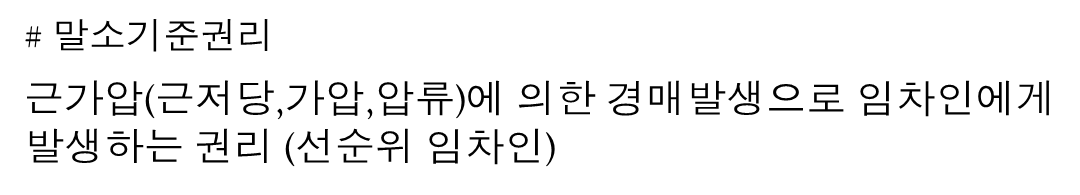

### 2007-09-14 Rent_date  vs  2005-09-14 Regist_date

## 4) 말소기준권리 컬럼 생성
- 선순위 임차권자: 근가압(근저당, 가압 등) 날짜보다 임차인이 전입한 날짜가 더 빠르다면, 새로 낙찰된 경매자는 임차인의 보증금을 책임져야함. 그러므로 보증금을 포함시켜서 경매가를 제출하게됨

- 반대로, 선순위 임차권자가 아닌 경우, 경매자는 임차인의 보증금을 책임질 필요는 없음

- regist.csv와 rent.csv를 이용





In [ ]:
regist['Regist_class']

0          소유이전
1        가압    
2        가압    
3        가압    
4         가처분  
          ...  
20697    가압    
20698    가압    
20699    가압    
20700    강제    
20701    저당    
Name: Regist_class, Length: 20702, dtype: object

In [ ]:
# str 타입 변형후, 빈칸 제거
regist['Regist_class'].astype('str').str.replace(" ", "")  

0        소유이전
1          가압
2          가압
3          가압
4         가처분
         ... 
20697      가압
20698      가압
20699      가압
20700      강제
20701      저당
Name: Regist_class, Length: 20702, dtype: object

In [ ]:
regist['Regist_class'] = regist['Regist_class'].astype('str').str.replace(" ", "").astype('str')

In [ ]:
regist['Regist_class'].value_counts()

가압      5339
저당      5330
압류      2886
소유이전    2572
임의      2403
강제       750
질권       627
가처분      296
         162
전세권       96
이전        87
가등기       84
임차권       54
보전처분      13
예고등기       3
Name: Regist_class, dtype: int64

In [ ]:
regist['Regist_class'].isin(['저당','압류','가압'])

0        False
1         True
2         True
3         True
4        False
         ...  
20697     True
20698     True
20699     True
20700    False
20701     True
Name: Regist_class, Length: 20702, dtype: bool

In [ ]:
# Regist_date 전처리
regist['Regist_date']

0        20050715
1        20050914
2        20051229
3        20060428
4        20070410
           ...   
20697    20160725
20698    20160829
20699    20161028
20700    20170717
20701    20110418
Name: Regist_date, Length: 20702, dtype: int64

In [ ]:
# 위와 같은 형식에서 datetime 타입으로
pd.to_datetime(regist['Regist_date'].astype('str').str.slice(0,4) + '-' +\
               regist['Regist_date'].astype('str').str.slice(4,6) + '-' +\
               regist['Regist_date'].astype('str').str.slice(6,8), errors='coerce')

0       2005-07-15
1       2005-09-14
2       2005-12-29
3       2006-04-28
4       2007-04-10
           ...    
20697   2016-07-25
20698   2016-08-29
20699   2016-10-28
20700   2017-07-17
20701   2011-04-18
Name: Regist_date, Length: 20702, dtype: datetime64[ns]

In [ ]:
regist['Regist_date'] = pd.to_datetime(regist['Regist_date'].astype('str').str.slice(0,4) + '-' +\
               regist['Regist_date'].astype('str').str.slice(4,6) + '-' +\
               regist['Regist_date'].astype('str').str.slice(6,8), errors='coerce')

In [ ]:
# 말소기준날짜 전처리

In [ ]:
regist.head()

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price
0,1,10001,집합건물등기,소유이전,2005-07-15,Private,0
1,1,10002,집합건물등기,가압,2005-09-14,푸른이상호저축은행,860547945
2,1,10003,집합건물등기,가압,2005-12-29,Private,189800000
3,1,10004,집합건물등기,가압,2006-04-28,Private,1346000000
4,1,10005,집합건물등기,가처분,2007-04-10,Private,0


In [ ]:
# regist.csv는 Auction_key별로 시퀀스로 구성되어 있기 때문에 groupby()로 불러오며, 저당,압류,가압(근가압) 경우를 봄 
# 건물의 등기일자 중에서 근가압을 한 가장 최소일자를 가져옴
regist.loc[pd.Series(regist['Regist_class']).isin(["저당","압류","가압"])].groupby(['Auction_key'])['Regist_date'].min().reset_index()

,Auction_key,Regist_date
0,1,2005-09-14
1,3,2005-09-14
2,5,2002-07-29
3,6,2011-03-31
4,7,2011-06-13
...,...,...
2624,2758,2015-07-23
2625,2759,2012-03-21
2626,2760,2014-02-25
2627,2761,2006-12-04


In [ ]:
# 근가압의 최소일자는 말소권리기준의 말소기준 날짜됨
expung = regist.loc[pd.Series(regist['Regist_class']).isin(["저당","압류","가압"])].groupby(['Auction_key'])['Regist_date'].min().reset_index()

In [ ]:
'''
말소기준날짜 보다 먼저 점유하고있던 임차인(선순위 임차인)이 있다면, 
낙찰자가 인수해야할 금액에 Rent_deposit 을 포함해야함
이를 위해서 rent.csv에 있는 임차인의 임차 날짜와 임차 유형을 전처리 필요!
'''

'\n말소기준날짜 보다 먼저 점유하고있던 임차인(선순위 임차인)이 있다면, \n낙찰자가 인수해야할 금액에 Rent_deposit 을 포함해야함\n이를 위해서 rent.csv에 있는 임차인의 임차 날짜와 임차 유형을 전처리 필요!\n'

In [ ]:
rent['Rent_date']

0       2007-09-14 00:00:00
1       2008-06-27 00:00:00
2       1111-11-11 00:00:00
3       1111-11-11 00:00:00
4       2007-01-08 00:00:00
               ...         
1551    2004-08-11 00:00:00
1552    2001-10-04 00:00:00
1553    2009-05-29 00:00:00
1554    2007-05-10 00:00:00
1555    2007-01-18 00:00:00
Name: Rent_date, Length: 1556, dtype: object

In [ ]:
# Rent_date 전처리
pd.to_datetime(rent['Rent_date'], errors='coerce')

0      2007-09-14
1      2008-06-27
2             NaT
3             NaT
4      2007-01-08
          ...    
1551   2004-08-11
1552   2001-10-04
1553   2009-05-29
1554   2007-05-10
1555   2007-01-18
Name: Rent_date, Length: 1556, dtype: datetime64[ns]

In [ ]:
rent['Rent_date'] = pd.to_datetime(rent['Rent_date'], errors='coerce')

In [ ]:
# 임차인의 임차 날짜가 비어있는 경우 -> 점유 : 선순위 임차인!
rent[rent['Rent_date'].isnull()][['Rent_date','Rent_class']]

,Rent_date,Rent_class
2,NaT,점유
3,NaT,점유
6,NaT,점유
7,NaT,점유
12,NaT,점유
...,...,...
1470,NaT,점유
1484,NaT,점유
1506,NaT,점유
1526,NaT,점유


In [ ]:
rent[['Rent_date','Rent_class']]

,Rent_date,Rent_class
0,2007-09-14,전입
1,2008-06-27,전입
2,NaT,점유
3,NaT,점유
4,2007-01-08,전입
...,...,...
1551,2004-08-11,전입
1552,2001-10-04,전입
1553,2009-05-29,전입
1554,2007-05-10,전입


In [ ]:
# rent.csv의 Rent_class 빈칸 처리이후 str 타입 변형
rent['Rent_class'].astype('str').str.replace(" ", "").astype('str')

0       전입
1       전입
2       점유
3       점유
4       전입
        ..
1551    전입
1552    전입
1553    전입
1554    전입
1555    전입
Name: Rent_class, Length: 1556, dtype: object

In [ ]:
rent['Rent_class'] = rent['Rent_class'].astype('str').str.replace(" ", "").astype('str')

In [ ]:
# 말소기준날짜 조회
expung

,Auction_key,Regist_date
0,1,2005-09-14
1,3,2005-09-14
2,5,2002-07-29
3,6,2011-03-31
4,7,2011-06-13
...,...,...
2624,2758,2015-07-23
2625,2759,2012-03-21
2626,2760,2014-02-25
2627,2761,2006-12-04


### 임차인의 정보를 넣었을때, 말소기준날짜에 따라 선순위 임차인 판단하기

In [ ]:
rent.loc[rent['Auctiuon_key']==1,'Rent_date']

0   2007-09-14
Name: Rent_date, dtype: datetime64[ns]

In [ ]:
# Auction_key를 기준으로 임차인의 임차 날짜와 등기 날짜 중에서 빠른 날짜를 판단.
# 2007-09-14 Rent_date  vs  2005-09-14 Regist_date
rent.loc[rent['Auctiuon_key']==1,'Rent_date'] > expung.loc[0, 'Regist_date']

0    True
Name: Rent_date, dtype: bool

In [ ]:
(rent.loc[rent['Auctiuon_key']==1,'Rent_date'] > expung.loc[0, 'Regist_date']).values

array([ True])

In [ ]:
np.asscalar((rent.loc[rent['Auctiuon_key']==1,'Rent_date'] > expung.loc[0, 'Regist_date']).values) & (rent['Rent_class']=="점유")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


0       False
1       False
2        True
3        True
4       False
        ...  
1551    False
1552    False
1553    False
1554    False
1555    False
Name: Rent_class, Length: 1556, dtype: bool

In [ ]:
len((expung.loc[expung['Auction_key']==1,"Regist_date"]))

1

In [ ]:
# 임차인의 정보를 넣었을때, 말소기준날짜에 따라 선순위 임차인 판단하기
def get_rent_expung(Auction_key, Rent_date, Rent_class):
  if pd.isnull(Rent_date) or len((expung.loc[expung['Auction_key']==Auction_key,"Regist_date"]))==0:
    return np.nan

  else: # 선순위 임차인 인 경우
    return (np.asscalar((Rent_date < expung.loc[expung['Auction_key']==Auction_key, "Regist_date"]).values) & (Rent_class=='점유'))

In [ ]:
# rent.csv 내에서 선순위 임차인 조회
k = rent.apply(lambda x: get_rent_expung(Rent_date=x['Rent_date'],Auction_key=x['Auctiuon_key'],Rent_class=x['Rent_class']),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys


In [ ]:
k.isnull().value_counts()

False    1335
True      221
dtype: int64

In [ ]:
# rent.csv 'k' 컬럼 생성
rent['k'] = k

In [ ]:
rent['k']

0       False
1         NaN
2         NaN
3         NaN
4       False
        ...  
1551    False
1552    False
1553    False
1554    False
1555    False
Name: k, Length: 1556, dtype: object

In [ ]:
rent.loc[rent['k']==True].groupby(['Auctiuon_key'])['Rent_deposit'].sum().reset_index()

,Auctiuon_key,Rent_deposit


In [ ]:
# ???
rent.loc[rent['k']==np.nan].groupby(['Auctiuon_key'])['Rent_deposit'].sum().reset_index()

,Auctiuon_key,Rent_deposit


In [ ]:
rent.loc[rent['k'].isnull()==True].groupby(['Auctiuon_key'])['Rent_deposit'].sum().reset_index() 

,Auctiuon_key,Rent_deposit
0,2,60000000
1,3,0
2,4,0
3,10,30000000
4,12,0
...,...,...
171,2633,800000000
172,2662,30000000
173,2680,0
174,2734,100000000


In [ ]:
rent.loc[rent['k']!=False].groupby(['Auctiuon_key'])['Rent_deposit'].sum().reset_index() 

,Auctiuon_key,Rent_deposit
0,2,60000000
1,3,0
2,4,0
3,10,30000000
4,12,0
...,...,...
171,2633,800000000
172,2662,30000000
173,2680,0
174,2734,100000000


In [ ]:
# 아니다, 위에 조건문에서 (Rent_class=='점유') 가 포함되어있으니 이 조건에서 보증금을 더해야한다! 
rent.loc[(rent['k']!=False)&(rent['Rent_class']=='점유'), ['k','Rent_class']]

,k,Rent_class
2,NaN,점유
3,NaN,점유
6,NaN,점유
7,NaN,점유
12,NaN,점유
...,...,...
1470,NaN,점유
1484,NaN,점유
1506,NaN,점유
1526,NaN,점유


In [ ]:
# 선순위 임차인 조건으로 경매자가 책임져야할 deposit!
rent.loc[(rent['k']!=False)&(rent['Rent_class']=='점유')].groupby(['Auctiuon_key'])['Rent_deposit'].sum().reset_index()

,Auctiuon_key,Rent_deposit
0,2,0
1,3,0
2,4,0
3,10,30000000
4,27,0
...,...,...
81,2533,100000000
82,2571,6500000
83,2633,800000000
84,2662,30000000


In [ ]:
rent.loc[(rent['k']!=False)&(rent['Rent_class']=='전입'), ['k','Rent_class']]

,k,Rent_class
1,NaN,전입
5,NaN,전입
39,NaN,전입
55,NaN,전입
104,NaN,전입
...,...,...
1443,NaN,전입
1449,NaN,전입
1490,NaN,전입
1535,NaN,전입


In [ ]:
k = rent.loc[rent['k']!=False].groupby(['Auctiuon_key'])['Rent_deposit'].sum().reset_index() 

In [ ]:
k.columns = ['Auction_key','Rent_deposit']

In [ ]:
# 선순위 임차인 보증금 구한 컬럼을 train과 merge
train = pd.merge(train, k, how='left')
train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Appraisal_company',
       'Appraisal_date', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_san', 'addr_bunji1', 'addr_etc', 'Apartment_usage',
       'Preserve_regist_date', 'Total_floor', 'Current_floor',
       'Share_auction_YorN', 'road_name', 'road_bunji1', 'Close_date',
       'Close_result', 'point.y', 'point.x', 'Hammer_price', 'Premium',
       'floor_ratio', 'log_land_real_area', 'log_land_auction_area',
       'log_land_gross_area', 'log_building_area', 'log_building_auction_area',
       'target_ratio', 'Appraisal_minimum', 'Claim_minimum', 'miscount_ratio',
       'Payment_days', 'Auction_days', 'Rent_deposit'],
      dtype='object')

In [ ]:
train[train['Rent_deposit']!=np.nan]

,Auction_key,Auction_class,Bid_class,Appraisal_company,Appraisal_date,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_bunji1,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,road_bunji1,Close_date,Close_result,point.y,point.x,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days,Rent_deposit
0,2687,0,0,정명감정,2017-07-26 00:00:00,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,0,해운대구,우동,N,1398.0,해운대엑소디움 5층 101-502호,0,2009-07-14 00:00:00,45,5,0,해운대해변로,30.0,2018-06-14,0,35.162717,129.137048,760000000,N,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,1.136364,0.80,0.378701,0.500000,4,1,NaN
1,2577,0,1,희감정,2016-09-12 00:00:00,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,0,해운대구,우동,N,1407.0,해운대두산위브더제니스 103동 51층 5103호,1,2011-12-16 00:00:00,70,51,0,마린시티2로,33.0,2017-03-30,0,35.156633,129.145068,971889999,N,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,1.132211,0.80,5.612407,0.500000,3,1,NaN
2,2197,0,0,혜림감정,2016-11-22 00:00:00,76160000,2017-07-28,2017-10-13,낙찰,국민은행,0,사상구,모라동,N,552.0,백양그린 206동 14층 1403호,1,1992-07-31 00:00:00,15,14,0,모라로110번길,88.0,2017-12-13,0,35.184601,128.996765,93399999,N,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,1.226366,0.64,6.724048,0.666667,3,4,NaN
3,2642,0,1,신라감정,2016-12-13 00:00:00,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,0,남구,대연동,N,243.0,대연청구 109동 11층 1102호,1,2001-07-13 00:00:00,20,11,0,황령대로319번가길,110.0,2017-12-27,0,35.154180,129.089081,256899000,N,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,1.113467,0.80,1.256770,0.500000,3,5,NaN
4,1958,1,1,나라감정,2016-03-07 00:00:00,136000000,2016-07-06,2016-08-03,낙찰,Private,0,사하구,괴정동,N,399.0,동조리젠시 7층 703호,1,2001-11-27 00:00:00,7,7,0,오작로,51.0,2016-10-04,0,35.099630,128.998874,158660000,N,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,1.166618,0.80,2.963759,0.500000,3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,1,1,삼창감정,2017-02-16 00:00:00,401000000,2017-06-19,2017-06-19,낙찰,Private,1,도봉구,창동,N,45.0,삼성 110동 15층 1501호,1,1992-08-29 00:00:00,21,15,0,노해로66길,21.0,2017-08-30,0,37.648810,127.048683,402500000,N,0.714,3.726898,3.726898,11.103758,4.452835,4.452835,1.003741,1.00,1.432143,0.000000,3,1,NaN
1929,1295,0,1,삼상감정,2015-02-21 00:00:00,363200000,2017-02-13,2017-03-13,낙찰,중소기업은행,1,노원구,상계동,N,1289.0,상계불암대림 205동 23층 2303호,1,2000-05-30 00:00:00,23,23,0,덕릉로94길,21.0,2017-05-24,0,37.663291,127.077063,430234600,N,1.000,3.703768,3.703768,9.924995,4.751951,4.751951,1.184567,0.80,1.816000,0.500000,3,1,NaN
1930,254,0,1,서초감정,2016-10-21 00:00:00,1028000000,2017-12-21,2018-01-18,낙찰,우리은행,1,중구,회현동1가,N,208.0,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",0,2011-12-13 00:00:00,32,19,0,소공로,35.0,2018-03-29,0,37.558319,126.981994,1118999990,P,0.594,2.997231,2.997231,8.917552,4.905127,4.905127,1.088521,0.80,2.897362,0.500000,3,1,NaN
1931,1486,1,1,한미감정,2016-06-17 00:00:00,325600000,2016-10-10,2016-11-14,낙찰,Private,1,도봉구,쌍문동,N,725.0,삼성래미안 110동 11층 1102호,1,2002-11-07 00:00:00,15,11,0,우이천로,328.0,2017-01-24,0,37.647061,127.028002,403000000,P,0.733,3.765840,3.765840,9.733695,4.453649,4.453649,1.237715,0.80,4.070000,0.500000,3,1,NaN


In [ ]:
# 비어있는 'Rent_deposit'은 0값으로 처리
np.where(train['Rent_deposit'].isnull(),0,train['Rent_deposit'])

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
train['Rent_deposit'] = np.where(train['Rent_deposit'].isnull(), 0, train['Rent_deposit'])

### regist 정보 넣었을때, 말소기준권리 이전에 일어난 권리행위 구하기

In [ ]:
regist

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price
0,1,10001,집합건물등기,소유이전,2005-07-15,Private,0
1,1,10002,집합건물등기,가압,2005-09-14,푸른이상호저축은행,860547945
2,1,10003,집합건물등기,가압,2005-12-29,Private,189800000
3,1,10004,집합건물등기,가압,2006-04-28,Private,1346000000
4,1,10005,집합건물등기,가처분,2007-04-10,Private,0
...,...,...,...,...,...,...,...
20697,2762,10002,집합건물등기,가압,2016-07-25,한국씨티은행,17393014
20698,2762,10003,집합건물등기,가압,2016-08-29,삼성생명보험,6751324
20699,2762,10004,집합건물등기,가압,2016-10-28,우리카드,8456049
20700,2762,10005,집합건물등기,강제,2017-07-17,삼성생명보험,0


In [ ]:
regist['Regist_date']

0       2005-07-15
1       2005-09-14
2       2005-12-29
3       2006-04-28
4       2007-04-10
           ...    
20697   2016-07-25
20698   2016-08-29
20699   2016-10-28
20700   2017-07-17
20701   2011-04-18
Name: Regist_date, Length: 20702, dtype: datetime64[ns]

In [ ]:
regist.isnull()

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
20697,False,False,False,False,False,False,False
20698,False,False,False,False,False,False,False
20699,False,False,False,False,False,False,False
20700,False,False,False,False,False,False,False


In [ ]:
# 근가압! (저당, 압류, 가압)
regist['Regist_class'].value_counts()

가압      5339
저당      5330
압류      2886
소유이전    2572
임의      2403
강제       750
질권       627
가처분      296
         162
전세권       96
이전        87
가등기       84
임차권       54
보전처분      13
예고등기       3
Name: Regist_class, dtype: int64

In [ ]:
# 말소권리기준 날짜 조회
expung

,Auction_key,Regist_date
0,1,2005-09-14
1,3,2005-09-14
2,5,2002-07-29
3,6,2011-03-31
4,7,2011-06-13
...,...,...
2624,2758,2015-07-23
2625,2759,2012-03-21
2626,2760,2014-02-25
2627,2761,2006-12-04


In [ ]:
# Auction_key 1번의 등기날짜는?
expung.loc[expung['Auction_key']==1]  

,Auction_key,Regist_date
0,1,2005-09-14


In [ ]:
# 말소기준권리 이전에 일어난 모든 행위 
def get_regist_expung(Auction_key, Regist_date, Regist_class):
  if pd.isnull(Regist_date) or len((expung.loc[expung['Auction_key']==Auction_key]))==0:
    return np.nan
  
  else:
    return (np.asscalar((Regist_date < expung.loc[expung['Auction_key']==Auction_key,'Regist_date']).values) & 
            (pd.Series(Regist_class).isin(['전세권','임차권','가등기'])))

In [ ]:
key = regist.apply(lambda x: get_regist_expung(Auction_key=x['Auction_key'], Regist_date=x['Regist_date'], Regist_class=x['Regist_class']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys


In [ ]:
key

,0
0,False
1,False
2,False
3,False
4,False
...,...
20697,False
20698,False
20699,False
20700,False


In [ ]:
type(key)

pandas.core.frame.DataFrame

In [ ]:
regist['key'] = key

In [ ]:
regist

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price,key
0,1,10001,집합건물등기,소유이전,2005-07-15,Private,0,False
1,1,10002,집합건물등기,가압,2005-09-14,푸른이상호저축은행,860547945,False
2,1,10003,집합건물등기,가압,2005-12-29,Private,189800000,False
3,1,10004,집합건물등기,가압,2006-04-28,Private,1346000000,False
4,1,10005,집합건물등기,가처분,2007-04-10,Private,0,False
...,...,...,...,...,...,...,...,...
20697,2762,10002,집합건물등기,가압,2016-07-25,한국씨티은행,17393014,False
20698,2762,10003,집합건물등기,가압,2016-08-29,삼성생명보험,6751324,False
20699,2762,10004,집합건물등기,가압,2016-10-28,우리카드,8456049,False
20700,2762,10005,집합건물등기,강제,2017-07-17,삼성생명보험,0,False


In [ ]:
# 등기부등본 상에서도 말소기준 권리 이전에 일어난 모든 권리행위의 Regist_price를 더해 take_over_regist라는 변수를 만든다.
regist[regist['key']==True]

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price,key
532,62,10009,집합건물등기,전세권,2014-09-15,Private,420000000,True
645,76,10007,집합건물등기,전세권,2015-02-13,Private,1400000000,True
696,82,10004,집합건물등기,전세권,2013-08-30,Private,2300000000,True
778,93,10004,집합건물등기,전세권,2013-02-28,Private,1400000000,True
996,119,10002,집합건물등기,전세권,2013-07-24,Private,390000000,True
1310,156,10001,집합건물등기,가등기,2014-05-02,Private,0,True
2358,288,10008,집합건물등기,전세권,2003-08-11,Private,160000000,True
2601,311,10007,집합건물등기,전세권,2014-03-20,Private,500000000,True
3872,467,10002,집합건물등기,가등기,2014-09-29,Private,0,True
3878,468,10002,집합건물등기,가등기,2014-09-29,Private,0,True


In [ ]:
pd.Series(regist.loc[regist['key']==True].groupby(['Auction_key'])['Regist_price'])

0          (62, [420000000])
1         (76, [1400000000])
2         (82, [2300000000])
3         (93, [1400000000])
4         (119, [390000000])
5                 (156, [0])
6         (288, [160000000])
7         (311, [500000000])
8                 (467, [0])
9                 (468, [0])
10                (638, [0])
11        (683, [100000000])
12        (887, [180000000])
13       (1213, [520000000])
14               (1339, [0])
15               (1505, [0])
16        (1844, [60000000])
17        (1846, [37900000])
18       (1852, [140000000])
19       (1877, [230000000])
20        (1936, [90000000])
21       (1943, [160000000])
22       (2008, [180000000])
23        (2025, [40000000])
24       (2059, [150000000])
25       (2088, [140000000])
26        (2098, [50000000])
27               (2100, [0])
28        (2154, [70000000])
29       (2170, [170000000])
30        (2171, [55000000])
31        (2202, [78000000])
32    (2217, [0, 110000000])
33       (2244, [100000000])
34        (228

In [ ]:
key = regist.loc[regist['key']==True].groupby(['Auction_key'])['Regist_price'].sum().reset_index()

In [ ]:
key.columns = ['Auction_key', 'Regist_deposit']

In [ ]:
train = pd.merge(train, key, how='left')

In [ ]:
train

,Auction_key,Auction_class,Bid_class,Appraisal_company,Appraisal_date,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_bunji1,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,road_bunji1,Close_date,Close_result,point.y,point.x,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days,Rent_deposit,Regist_deposit
0,2687,0,0,정명감정,2017-07-26 00:00:00,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,0,해운대구,우동,N,1398.0,해운대엑소디움 5층 101-502호,0,2009-07-14 00:00:00,45,5,0,해운대해변로,30.0,2018-06-14,0,35.162717,129.137048,760000000,N,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,1.136364,0.80,0.378701,0.500000,4,1,0.0,NaN
1,2577,0,1,희감정,2016-09-12 00:00:00,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,0,해운대구,우동,N,1407.0,해운대두산위브더제니스 103동 51층 5103호,1,2011-12-16 00:00:00,70,51,0,마린시티2로,33.0,2017-03-30,0,35.156633,129.145068,971889999,N,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,1.132211,0.80,5.612407,0.500000,3,1,0.0,NaN
2,2197,0,0,혜림감정,2016-11-22 00:00:00,76160000,2017-07-28,2017-10-13,낙찰,국민은행,0,사상구,모라동,N,552.0,백양그린 206동 14층 1403호,1,1992-07-31 00:00:00,15,14,0,모라로110번길,88.0,2017-12-13,0,35.184601,128.996765,93399999,N,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,1.226366,0.64,6.724048,0.666667,3,4,0.0,NaN
3,2642,0,1,신라감정,2016-12-13 00:00:00,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,0,남구,대연동,N,243.0,대연청구 109동 11층 1102호,1,2001-07-13 00:00:00,20,11,0,황령대로319번가길,110.0,2017-12-27,0,35.154180,129.089081,256899000,N,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,1.113467,0.80,1.256770,0.500000,3,5,0.0,NaN
4,1958,1,1,나라감정,2016-03-07 00:00:00,136000000,2016-07-06,2016-08-03,낙찰,Private,0,사하구,괴정동,N,399.0,동조리젠시 7층 703호,1,2001-11-27 00:00:00,7,7,0,오작로,51.0,2016-10-04,0,35.099630,128.998874,158660000,N,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,1.166618,0.80,2.963759,0.500000,3,1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,1,1,삼창감정,2017-02-16 00:00:00,401000000,2017-06-19,2017-06-19,낙찰,Private,1,도봉구,창동,N,45.0,삼성 110동 15층 1501호,1,1992-08-29 00:00:00,21,15,0,노해로66길,21.0,2017-08-30,0,37.648810,127.048683,402500000,N,0.714,3.726898,3.726898,11.103758,4.452835,4.452835,1.003741,1.00,1.432143,0.000000,3,1,0.0,NaN
1929,1295,0,1,삼상감정,2015-02-21 00:00:00,363200000,2017-02-13,2017-03-13,낙찰,중소기업은행,1,노원구,상계동,N,1289.0,상계불암대림 205동 23층 2303호,1,2000-05-30 00:00:00,23,23,0,덕릉로94길,21.0,2017-05-24,0,37.663291,127.077063,430234600,N,1.000,3.703768,3.703768,9.924995,4.751951,4.751951,1.184567,0.80,1.816000,0.500000,3,1,0.0,NaN
1930,254,0,1,서초감정,2016-10-21 00:00:00,1028000000,2017-12-21,2018-01-18,낙찰,우리은행,1,중구,회현동1가,N,208.0,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",0,2011-12-13 00:00:00,32,19,0,소공로,35.0,2018-03-29,0,37.558319,126.981994,1118999990,P,0.594,2.997231,2.997231,8.917552,4.905127,4.905127,1.088521,0.80,2.897362,0.500000,3,1,0.0,NaN
1931,1486,1,1,한미감정,2016-06-17 00:00:00,325600000,2016-10-10,2016-11-14,낙찰,Private,1,도봉구,쌍문동,N,725.0,삼성래미안 110동 11층 1102호,1,2002-11-07 00:00:00,15,11,0,우이천로,328.0,2017-01-24,0,37.647061,127.028002,403000000,P,0.733,3.765840,3.765840,9.733695,4.453649,4.453649,1.237715,0.80,4.070000,0.500000,3,1,0.0,NaN


### 합계 deposit = 임차인 deposit + 등기상의 deposit

In [ ]:
# Regist_deposit NaN 0값으로 처리
train['Regist_deposit'] = np.where(train['Regist_deposit'].isnull(), 0, train['Regist_deposit'])

In [ ]:
train['Sum_deposit'] = train['Rent_deposit'] + train['Regist_deposit']

In [ ]:
# 합계 deposit, minimal_price 나눠줌
train['Sum_deposit'] = train['Sum_deposit'] / train['Minimum_sales_price']

### 선순위 임차인 categorical 캐스팅

- 경매의 매물에서 선순위 임차권자가 점유하고 있는 경우 유찰이 발생할 수 있는 요인을 지니고 있으므로 유찰이 되거나, 경매기간이 길어질 수 있는 요인이 될 수 있음


In [ ]:
# 선순위 임차인 있는 인덱스 조회
train[train['Sum_deposit']!=0].index

Int64Index([  17,   32,   37,   39,   49,   58,  118,  119,  126,  136,  170,
             200,  203,  212,  283,  294,  303,  307,  317,  326,  373,  375,
             378,  408,  418,  450,  503,  504,  505,  561,  579,  585,  599,
             600,  610,  665,  697,  758,  814,  861,  872,  991, 1021, 1039,
            1055, 1103, 1128, 1132, 1141, 1158, 1170, 1208, 1310, 1313, 1327,
            1437, 1515, 1521, 1572, 1617, 1643, 1677, 1718, 1753, 1817, 1875],
           dtype='int64')

In [ ]:
# Sum_deposit 결측값 0값으로 처리
train['Sum_deposit'] = np.where(train['Sum_deposit'].isnull(), 0, train['Sum_deposit'])

In [ ]:
train

,Auction_key,Auction_class,Bid_class,Appraisal_company,Appraisal_date,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_bunji1,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,road_bunji1,Close_date,Close_result,point.y,point.x,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days,Rent_deposit,Regist_deposit,Sum_deposit
0,2687,0,0,정명감정,2017-07-26 00:00:00,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,0,해운대구,우동,N,1398.0,해운대엑소디움 5층 101-502호,0,2009-07-14 00:00:00,45,5,0,해운대해변로,30.0,2018-06-14,0,35.162717,129.137048,760000000,N,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,1.136364,0.80,0.378701,0.500000,4,1,0.0,0.0,0.0
1,2577,0,1,희감정,2016-09-12 00:00:00,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,0,해운대구,우동,N,1407.0,해운대두산위브더제니스 103동 51층 5103호,1,2011-12-16 00:00:00,70,51,0,마린시티2로,33.0,2017-03-30,0,35.156633,129.145068,971889999,N,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,1.132211,0.80,5.612407,0.500000,3,1,0.0,0.0,0.0
2,2197,0,0,혜림감정,2016-11-22 00:00:00,76160000,2017-07-28,2017-10-13,낙찰,국민은행,0,사상구,모라동,N,552.0,백양그린 206동 14층 1403호,1,1992-07-31 00:00:00,15,14,0,모라로110번길,88.0,2017-12-13,0,35.184601,128.996765,93399999,N,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,1.226366,0.64,6.724048,0.666667,3,4,0.0,0.0,0.0
3,2642,0,1,신라감정,2016-12-13 00:00:00,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,0,남구,대연동,N,243.0,대연청구 109동 11층 1102호,1,2001-07-13 00:00:00,20,11,0,황령대로319번가길,110.0,2017-12-27,0,35.154180,129.089081,256899000,N,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,1.113467,0.80,1.256770,0.500000,3,5,0.0,0.0,0.0
4,1958,1,1,나라감정,2016-03-07 00:00:00,136000000,2016-07-06,2016-08-03,낙찰,Private,0,사하구,괴정동,N,399.0,동조리젠시 7층 703호,1,2001-11-27 00:00:00,7,7,0,오작로,51.0,2016-10-04,0,35.099630,128.998874,158660000,N,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,1.166618,0.80,2.963759,0.500000,3,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,1,1,삼창감정,2017-02-16 00:00:00,401000000,2017-06-19,2017-06-19,낙찰,Private,1,도봉구,창동,N,45.0,삼성 110동 15층 1501호,1,1992-08-29 00:00:00,21,15,0,노해로66길,21.0,2017-08-30,0,37.648810,127.048683,402500000,N,0.714,3.726898,3.726898,11.103758,4.452835,4.452835,1.003741,1.00,1.432143,0.000000,3,1,0.0,0.0,0.0
1929,1295,0,1,삼상감정,2015-02-21 00:00:00,363200000,2017-02-13,2017-03-13,낙찰,중소기업은행,1,노원구,상계동,N,1289.0,상계불암대림 205동 23층 2303호,1,2000-05-30 00:00:00,23,23,0,덕릉로94길,21.0,2017-05-24,0,37.663291,127.077063,430234600,N,1.000,3.703768,3.703768,9.924995,4.751951,4.751951,1.184567,0.80,1.816000,0.500000,3,1,0.0,0.0,0.0
1930,254,0,1,서초감정,2016-10-21 00:00:00,1028000000,2017-12-21,2018-01-18,낙찰,우리은행,1,중구,회현동1가,N,208.0,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",0,2011-12-13 00:00:00,32,19,0,소공로,35.0,2018-03-29,0,37.558319,126.981994,1118999990,P,0.594,2.997231,2.997231,8.917552,4.905127,4.905127,1.088521,0.80,2.897362,0.500000,3,1,0.0,0.0,0.0
1931,1486,1,1,한미감정,2016-06-17 00:00:00,325600000,2016-10-10,2016-11-14,낙찰,Private,1,도봉구,쌍문동,N,725.0,삼성래미안 110동 11층 1102호,1,2002-11-07 00:00:00,15,11,0,우이천로,328.0,2017-01-24,0,37.647061,127.028002,403000000,P,0.733,3.765840,3.765840,9.733695,4.453649,4.453649,1.237715,0.80,4.070000,0.500000,3,1,0.0,0.0,0.0


In [ ]:
# Sum_deposit을 구했으니, Rent_deposit과 Regist_depost은 drop!
train.drop(['Rent_deposit', 'Regist_deposit'],axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Auction_key                1933 non-null   int64         
 1   Auction_class              1933 non-null   int64         
 2   Bid_class                  1933 non-null   int64         
 3   Appraisal_company          1933 non-null   object        
 4   Appraisal_date             1933 non-null   object        
 5   Minimum_sales_price        1933 non-null   int64         
 6   First_auction_date         1933 non-null   datetime64[ns]
 7   Final_auction_date         1933 non-null   datetime64[ns]
 8   Final_result               1933 non-null   object        
 9   Creditor                   1933 non-null   object        
 10  addr_do                    1933 non-null   int64         
 11  addr_si                    1933 non-null   object        
 12  addr_d

In [ ]:
# 구해준 Sum_deposit의 왜도가 높다.
train.skew()

Auction_key                  -0.005705
Auction_class                 1.121696
Bid_class                    -2.652043
Minimum_sales_price          12.332838
addr_do                      -0.595236
addr_bunji1                   2.180236
Apartment_usage              -2.037659
Total_floor                   1.977065
Current_floor                 2.425969
Share_auction_YorN            4.641594
road_bunji1                   3.349938
Close_result                 12.583134
point.y                      -0.592655
point.x                       0.585114
Hammer_price                 11.178607
floor_ratio                   0.076681
log_land_real_area           -2.135434
log_land_auction_area        -1.967766
log_land_gross_area          -1.694864
log_building_area            -0.088860
log_building_auction_area    -0.705025
target_ratio                  0.929477
Appraisal_minimum            -0.688720
Claim_minimum                      NaN
miscount_ratio               -0.424387
Payment_days             

In [ ]:
# Sum_deposit 정규화를 위한 log를 취함
train['Sum_deposit'] = np.log1p(train['Sum_deposit']) 
train['Sum_deposit'].skew()

8.284164136495734

In [ ]:
# 선순위 임차인 조회
# train[train['Sum_deposit']!=0]

,Auction_key,Auction_class,Bid_class,Appraisal_company,Appraisal_date,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_bunji1,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,road_bunji1,Close_date,Close_result,point.y,point.x,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit
17,1861,0,0,대일감정,2015-12-02 00:00:00,128000000,2016-05-06,2016-07-29,낙찰,부산은행,0,동래구,온천동,N,189.0,아이너스 12층 1203호,1,2014-12-19 00:00:00,14,12,0,차밭골로,24.0,2016-12-22,0,35.216645,129.079149,133000000,N,0.857,2.150599,2.150599,5.805135,3.798406,3.798406,1.039062,0.8000,1.222908e-01,0.500000,6,4,0.485508
32,1826,0,1,태화감정,2015-09-21 00:00:00,53600000,2016-09-30,2016-12-29,낙찰,Private,0,연제구,연산동,Y,20.0,국토 4층 402호,1,1111-11-11 00:00:00,8,4,0,망미번영로,103.0,2017-03-08,0,35.176351,129.111235,55203000,N,0.500,0.000000,0.000000,0.000000,4.237001,4.237001,1.029907,0.8000,1.191111e+00,0.333333,3,4,0.875158
37,2025,1,1,나라감정,2016-05-10 00:00:00,36800000,2017-02-14,2017-03-21,낙찰,Private,0,중구,보수동2가,N,118.0,노블레스힐 7층 706호,0,2002-08-27 00:00:00,10,7,0,대청로,37.0,2017-05-24,0,35.103379,129.024085,45980000,N,0.700,1.619388,1.619388,5.940171,3.249987,3.249987,1.249457,0.8000,9.200000e-01,0.500000,3,1,0.735707
39,2332,0,0,부경감정,2017-01-13 00:00:00,95200000,2017-10-13,2017-11-17,낙찰,국민은행,0,사상구,모라동,N,552.0,백양그린 207동 12층 1208호,1,1992-07-31 00:00:00,15,12,0,모라로110번길,88.0,2018-01-31,0,35.184601,128.996765,104110000,N,0.800,4.276666,4.276666,11.916282,3.930648,3.930648,1.093592,0.8000,1.672684e+01,0.500000,3,1,0.099883
49,2171,0,0,대화감정,2016-10-24 00:00:00,94000000,2017-05-10,2017-05-10,낙찰,영진건설,0,부산진구,전포동,N,892.0,서면노르웨이아침 18층 1811호,0,2004-11-15 00:00:00,27,18,0,동천로,10.0,2017-07-20,0,35.149961,129.063476,96581000,N,0.667,1.690096,1.690096,7.687264,3.677060,3.677060,1.027457,1.0000,9.400000e-01,0.000000,3,1,0.460652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,826,0,1,정금감정,2016-08-25 00:00:00,500000000,2016-12-20,2016-12-20,낙찰,Private,1,마포구,창전동,N,440.0,현대홈타운 102동 6층 601호,1,2005-09-14 00:00:00,21,6,0,서강로,83.0,2017-02-28,0,37.550795,126.931844,523680790,N,0.286,3.263849,3.263849,8.974188,4.105120,4.105120,1.047362,1.0000,1.352980e+00,0.000000,3,1,0.019803
1718,1629,1,1,영현감정,2016-11-11 00:00:00,275000000,2017-03-20,2017-03-20,낙찰,Private,1,동대문구,용두동,N,790.0,롯데캐슬피렌체 12층 102-1206호,0,2009-03-09 00:00:00,14,12,0,정릉천동로,58.0,2017-05-19,0,37.577193,127.035711,275200000,P,0.857,2.228939,2.228939,8.945137,3.446808,3.446808,1.000727,1.0000,2.750000e+00,0.000000,3,1,0.310155
1753,1065,0,1,지녕감정,2016-05-20 00:00:00,520000000,2016-12-14,2017-01-24,낙찰,Private,1,양천구,신정동,N,1295.0,목동2차삼성래미안 103동 7층 702호,1,2001-12-19 00:00:00,13,7,0,목동남로4길,81.0,2017-03-15,0,37.510466,126.868286,600000000,P,0.538,3.974434,3.974434,9.080118,4.746322,4.746322,1.153846,0.8000,5.200000e+08,0.500000,2,2,0.819441
1817,1662,0,1,생림감정,2017-03-17 00:00:00,314400000,2017-08-21,2018-02-26,낙찰,세종상호저축은행,1,성북구,하월곡동,N,224.0,", 종암동 129, 청량리동 949 샹그레빌 103동 18층 1805호",1,2004-08-09 00:00:00,22,18,0,회기로5길,100.0,2018-05-18,0,37.596513,127.041440,402559800,N,0.818,3.453157,3.453157,9.330955,4.385147,4.385147,1.280406,0.8000,1.029479e+00,0.500000,4,6,0.031311


In [ ]:
# 선순위 임차인이 아닌 경우
# train[train['Sum_deposit']==0]

,Auction_key,Auction_class,Bid_class,Appraisal_company,Appraisal_date,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_bunji1,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,road_bunji1,Close_date,Close_result,point.y,point.x,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit
0,2687,0,0,정명감정,2017-07-26 00:00:00,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,0,해운대구,우동,N,1398.0,해운대엑소디움 5층 101-502호,0,2009-07-14 00:00:00,45,5,0,해운대해변로,30.0,2018-06-14,0,35.162717,129.137048,760000000,N,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,1.136364,0.80,0.378701,0.500000,4,1,0.0
1,2577,0,1,희감정,2016-09-12 00:00:00,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,0,해운대구,우동,N,1407.0,해운대두산위브더제니스 103동 51층 5103호,1,2011-12-16 00:00:00,70,51,0,마린시티2로,33.0,2017-03-30,0,35.156633,129.145068,971889999,N,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,1.132211,0.80,5.612407,0.500000,3,1,0.0
2,2197,0,0,혜림감정,2016-11-22 00:00:00,76160000,2017-07-28,2017-10-13,낙찰,국민은행,0,사상구,모라동,N,552.0,백양그린 206동 14층 1403호,1,1992-07-31 00:00:00,15,14,0,모라로110번길,88.0,2017-12-13,0,35.184601,128.996765,93399999,N,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,1.226366,0.64,6.724048,0.666667,3,4,0.0
3,2642,0,1,신라감정,2016-12-13 00:00:00,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,0,남구,대연동,N,243.0,대연청구 109동 11층 1102호,1,2001-07-13 00:00:00,20,11,0,황령대로319번가길,110.0,2017-12-27,0,35.154180,129.089081,256899000,N,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,1.113467,0.80,1.256770,0.500000,3,5,0.0
4,1958,1,1,나라감정,2016-03-07 00:00:00,136000000,2016-07-06,2016-08-03,낙찰,Private,0,사하구,괴정동,N,399.0,동조리젠시 7층 703호,1,2001-11-27 00:00:00,7,7,0,오작로,51.0,2016-10-04,0,35.099630,128.998874,158660000,N,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,1.166618,0.80,2.963759,0.500000,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,1,1,삼창감정,2017-02-16 00:00:00,401000000,2017-06-19,2017-06-19,낙찰,Private,1,도봉구,창동,N,45.0,삼성 110동 15층 1501호,1,1992-08-29 00:00:00,21,15,0,노해로66길,21.0,2017-08-30,0,37.648810,127.048683,402500000,N,0.714,3.726898,3.726898,11.103758,4.452835,4.452835,1.003741,1.00,1.432143,0.000000,3,1,0.0
1929,1295,0,1,삼상감정,2015-02-21 00:00:00,363200000,2017-02-13,2017-03-13,낙찰,중소기업은행,1,노원구,상계동,N,1289.0,상계불암대림 205동 23층 2303호,1,2000-05-30 00:00:00,23,23,0,덕릉로94길,21.0,2017-05-24,0,37.663291,127.077063,430234600,N,1.000,3.703768,3.703768,9.924995,4.751951,4.751951,1.184567,0.80,1.816000,0.500000,3,1,0.0
1930,254,0,1,서초감정,2016-10-21 00:00:00,1028000000,2017-12-21,2018-01-18,낙찰,우리은행,1,중구,회현동1가,N,208.0,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",0,2011-12-13 00:00:00,32,19,0,소공로,35.0,2018-03-29,0,37.558319,126.981994,1118999990,P,0.594,2.997231,2.997231,8.917552,4.905127,4.905127,1.088521,0.80,2.897362,0.500000,3,1,0.0
1931,1486,1,1,한미감정,2016-06-17 00:00:00,325600000,2016-10-10,2016-11-14,낙찰,Private,1,도봉구,쌍문동,N,725.0,삼성래미안 110동 11층 1102호,1,2002-11-07 00:00:00,15,11,0,우이천로,328.0,2017-01-24,0,37.647061,127.028002,403000000,P,0.733,3.765840,3.765840,9.733695,4.453649,4.453649,1.237715,0.80,4.070000,0.500000,3,1,0.0


In [ ]:
# 선순위 임차인 경우, 1로 
train.loc[train['Sum_deposit']!=0, 'Sum_deposit'] = 1

# 임차인 점유가 아닌 경우, 0
train.loc[train['Sum_deposit']==0, 'Sum_deposit'] = 0

In [ ]:
train[train['Sum_deposit']!=0]['Sum_deposit']

17      1.0
32      1.0
37      1.0
39      1.0
49      1.0
       ... 
1677    1.0
1718    1.0
1753    1.0
1817    1.0
1875    1.0
Name: Sum_deposit, Length: 66, dtype: float64

In [ ]:
train[train['Sum_deposit']==0]['Sum_deposit']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1928    0.0
1929    0.0
1930    0.0
1931    0.0
1932    0.0
Name: Sum_deposit, Length: 1867, dtype: float64

In [ ]:
train['Sum_deposit'].value_counts()

0.0    1867
1.0      66
Name: Sum_deposit, dtype: int64

## 5) 오랜된 건물 categorical 컬럼 생성

In [ ]:
# regist.csv 
regist.head()

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price,key
0,1,10001,집합건물등기,소유이전,2005-07-15,Private,0,False
1,1,10002,집합건물등기,가압,2005-09-14,푸른이상호저축은행,860547945,False
2,1,10003,집합건물등기,가압,2005-12-29,Private,189800000,False
3,1,10004,집합건물등기,가압,2006-04-28,Private,1346000000,False
4,1,10005,집합건물등기,가처분,2007-04-10,Private,0,False


In [ ]:
regist['Regist_date'] 

0       2005-07-15
1       2005-09-14
2       2005-12-29
3       2006-04-28
4       2007-04-10
           ...    
20697   2016-07-25
20698   2016-08-29
20699   2016-10-28
20700   2017-07-17
20701   2011-04-18
Name: Regist_date, Length: 20702, dtype: datetime64[ns]

In [ ]:
# Auction_key 별 가장 빠른 날짜
regist.groupby('Auction_key')['Regist_date'].min()

Auction_key
1      2005-07-15
2             NaT
3      2005-08-12
4      2012-03-20
5      2002-06-20
          ...    
2758   2002-08-05
2759   2012-03-21
2760   2014-02-25
2761   2006-12-04
2762   2005-03-24
Name: Regist_date, Length: 2732, dtype: datetime64[ns]

In [ ]:
regist['Regist_date']

0       2005-07-15
1       2005-09-14
2       2005-12-29
3       2006-04-28
4       2007-04-10
           ...    
20697   2016-07-25
20698   2016-08-29
20699   2016-10-28
20700   2017-07-17
20701   2011-04-18
Name: Regist_date, Length: 20702, dtype: datetime64[ns]

In [ ]:
regist[regist['Regist_date'].isin([99999999])]

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price,key


### built_date 컬럼 생성

In [ ]:
# train, regist의 Auction_key에 따라 regist의 Regist_date 에서 가장 빠른 날짜를 가지고옴
train['built_date'] = train.apply(lambda x: regist.loc[(regist['Auction_key']==x['Auction_key']), "Regist_date"].min(),axis=1)

In [ ]:
train['built_date']

0      2013-12-20
1      2012-03-29
2      1992-10-15
3      2013-05-27
4      2006-07-07
          ...    
1928   2007-02-23
1929   2000-06-20
1930   2012-02-10
1931   2006-08-16
1932   2013-12-20
Name: built_date, Length: 1933, dtype: datetime64[ns]

In [ ]:
# 날짜를 datetime 타입의 년도로 인덱싱
pd.DatetimeIndex(train['built_date']).year

Float64Index([2013.0, 2012.0, 1992.0, 2013.0, 2006.0, 2015.0, 2011.0, 2013.0,
              2006.0, 2001.0,
              ...
              2000.0, 2001.0, 2015.0, 2015.0, 2015.0, 2007.0, 2000.0, 2012.0,
              2006.0, 2013.0],
             dtype='float64', name='built_date', length=1933)

In [ ]:
train['built_date'] = pd.DatetimeIndex(train['built_date']).year

In [ ]:
# built_date 컬럼 결측값 확인
train['built_date'].isnull().sum()

45

In [ ]:
train[train['built_date'].isnull()]['built_date']

17     NaN
29     NaN
84     NaN
122    NaN
200    NaN
203    NaN
224    NaN
239    NaN
311    NaN
370    NaN
408    NaN
464    NaN
491    NaN
496    NaN
560    NaN
570    NaN
613    NaN
637    NaN
658    NaN
665    NaN
703    NaN
714    NaN
885    NaN
940    NaN
960    NaN
1021   NaN
1069   NaN
1097   NaN
1155   NaN
1178   NaN
1242   NaN
1296   NaN
1426   NaN
1428   NaN
1437   NaN
1458   NaN
1475   NaN
1560   NaN
1587   NaN
1611   NaN
1698   NaN
1724   NaN
1814   NaN
1818   NaN
1860   NaN
Name: built_date, dtype: float64

In [ ]:
train['built_date'].median()  # 데이터년도 중간값

2008.0

In [ ]:
# built_date 결측값에 년도 중간값으로 채우기
train['built_date'] = np.where(train['built_date'].isnull(), train['built_date'].median(), train['built_date'])

In [ ]:
train['built_date']

0       2013.0
1       2012.0
2       1992.0
3       2013.0
4       2006.0
         ...  
1928    2007.0
1929    2000.0
1930    2012.0
1931    2006.0
1932    2013.0
Name: built_date, Length: 1933, dtype: float64

In [ ]:
# 건축년도이 2000년도 기준 bool 타입 
train['built_date'] >= 2000

0        True
1        True
2       False
3        True
4        True
        ...  
1928     True
1929     True
1930     True
1931     True
1932     True
Name: built_date, Length: 1933, dtype: bool

In [ ]:
train['built_date'] = train['built_date'] >= 2000

In [ ]:
train['built_date']

0        True
1        True
2       False
3        True
4        True
        ...  
1928     True
1929     True
1930     True
1931     True
1932     True
Name: built_date, Length: 1933, dtype: bool

# too many or large float64 values 해결
- 보동소수정 round 처리?
- 링크 : https://www.it-swarm.dev/ko/python/sklearn-%EC%98%A4%EB%A5%98-valueerror-%EC%9E%85%EB%A0%A5%EC%97%90-nan-%EB%AC%B4%ED%95%9C%EB%8C%80-%EB%98%90%EB%8A%94-dtype-%27float64%27%EC%97%90-%EB%B9%84%ED%95%B4-%EB%84%88%EB%AC%B4-%ED%81%B0-%EA%B0%92%EC%9D%B4-%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4/1054979459/

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Auction_key                1933 non-null   int64         
 1   Auction_class              1933 non-null   int64         
 2   Bid_class                  1933 non-null   int64         
 3   Appraisal_company          1933 non-null   object        
 4   Appraisal_date             1933 non-null   object        
 5   Minimum_sales_price        1933 non-null   int64         
 6   First_auction_date         1933 non-null   datetime64[ns]
 7   Final_auction_date         1933 non-null   datetime64[ns]
 8   Final_result               1933 non-null   object        
 9   Creditor                   1933 non-null   object        
 10  addr_do                    1933 non-null   int64         
 11  addr_si                    1933 non-null   object        
 12  addr_d

In [ ]:
# train['target_ratio']

In [ ]:
# 종속변수 round 처리
# train['target_ratio'] = round(train['target_ratio'], 2)

In [ ]:
train.head()

,Auction_key,Auction_class,Bid_class,Appraisal_company,Appraisal_date,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_bunji1,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,road_bunji1,Close_date,Close_result,point.y,point.x,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit,built_date
0,2687,0,0,정명감정,2017-07-26 00:00:00,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,0,해운대구,우동,N,1398.0,해운대엑소디움 5층 101-502호,0,2009-07-14 00:00:00,45,5,0,해운대해변로,30.0,2018-06-14,0,35.162717,129.137048,760000000,N,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,1.136364,0.80,0.378701,0.500000,4,1,0.0,True
1,2577,0,1,희감정,2016-09-12 00:00:00,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,0,해운대구,우동,N,1407.0,해운대두산위브더제니스 103동 51층 5103호,1,2011-12-16 00:00:00,70,51,0,마린시티2로,33.0,2017-03-30,0,35.156633,129.145068,971889999,N,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,1.132211,0.80,5.612407,0.500000,3,1,0.0,True
2,2197,0,0,혜림감정,2016-11-22 00:00:00,76160000,2017-07-28,2017-10-13,낙찰,국민은행,0,사상구,모라동,N,552.0,백양그린 206동 14층 1403호,1,1992-07-31 00:00:00,15,14,0,모라로110번길,88.0,2017-12-13,0,35.184601,128.996765,93399999,N,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,1.226366,0.64,6.724048,0.666667,3,4,0.0,False
3,2642,0,1,신라감정,2016-12-13 00:00:00,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,0,남구,대연동,N,243.0,대연청구 109동 11층 1102호,1,2001-07-13 00:00:00,20,11,0,황령대로319번가길,110.0,2017-12-27,0,35.154180,129.089081,256899000,N,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,1.113467,0.80,1.256770,0.500000,3,5,0.0,True
4,1958,1,1,나라감정,2016-03-07 00:00:00,136000000,2016-07-06,2016-08-03,낙찰,Private,0,사하구,괴정동,N,399.0,동조리젠시 7층 703호,1,2001-11-27 00:00:00,7,7,0,오작로,51.0,2016-10-04,0,35.099630,128.998874,158660000,N,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,1.166618,0.80,2.963759,0.500000,3,1,0.0,True


In [ ]:
# 면적 log 데이터 round 처리    train.round({'log_land_gross_area' : 2})
# train[['log_land_gross_area','log_land_real_area','log_land_auction_area','log_building_area','log_building_auction_area']] = \
# round(train[['log_land_gross_area','log_land_real_area','log_land_auction_area','log_building_area','log_building_auction_area']],2)

In [ ]:
# train[['log_land_gross_area','log_land_real_area','log_land_auction_area','log_building_area','log_building_auction_area']]

In [ ]:
# 컬럼 추가 비율 데이터 round 처리
# train[['floor_ratio','Claim_minimum','Appraisal_minimum']] = \
# round(train[['floor_ratio','Claim_minimum','Appraisal_minimum']],2)

In [ ]:
train[['floor_ratio','Claim_minimum','Appraisal_minimum']]

,floor_ratio,Claim_minimum,Appraisal_minimum
0,0.111,0.378701,0.80
1,0.729,5.612407,0.80
2,0.933,6.724048,0.64
3,0.550,1.256770,0.80
4,1.000,2.963759,0.80
...,...,...,...
1928,0.714,1.432143,1.00
1929,1.000,1.816000,0.80
1930,0.594,2.897362,0.80
1931,0.733,4.070000,0.80


In [ ]:
# Claim Minimum은 왜 NaN이 뜨는거지?!

In [ ]:
# 유찰 비율 round 처리
train['miscount_ratio'] = round(train['miscount_ratio'], 1)

# 불필요한 컬럼 제거
- key, 감정사, 은행사, 기타주소, 도로주소, 날짜, 낙찰결과, 층수, 위도/경도, 유찰 횟수, target_apraisal(종속변수 강하게 관련)

In [ ]:
train.drop([
            'Creditor','addr_si','addr_dong','addr_san','point.x','point.y',\
            'addr_bunji1','addr_etc','road_name','road_bunji1','Final_result',\
            'Appraisal_date','Close_date','First_auction_date','Preserve_regist_date','Final_auction_date',\
            'Preserve_regist_date','Total_floor','Current_floor','Appraisal_company','Auction_key','Close_result'
], axis=1, inplace=True)

In [ ]:
train.head()

,Auction_class,Bid_class,Minimum_sales_price,addr_do,Apartment_usage,Share_auction_YorN,Hammer_price,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,target_ratio,Appraisal_minimum,Claim_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit,built_date
0,0,0,668800000,0,0,0,760000000,N,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,1.136364,0.80,0.378701,0.5,4,1,0.0,True
1,0,1,858400000,0,1,0,971889999,N,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,1.132211,0.80,5.612407,0.5,3,1,0.0,True
2,0,0,76160000,0,1,0,93399999,N,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,1.226366,0.64,6.724048,0.7,3,4,0.0,False
3,0,1,230720000,0,1,0,256899000,N,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,1.113467,0.80,1.256770,0.5,3,5,0.0,True
4,1,1,136000000,0,1,0,158660000,N,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,1.166618,0.80,2.963759,0.5,3,1,0.0,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Auction_class              1933 non-null   int64   
 1   Bid_class                  1933 non-null   int64   
 2   Minimum_sales_price        1933 non-null   int64   
 3   addr_do                    1933 non-null   int64   
 4   Apartment_usage            1933 non-null   int64   
 5   Share_auction_YorN         1933 non-null   int64   
 6   Hammer_price               1933 non-null   int64   
 7   Premium                    1933 non-null   object  
 8   floor_ratio                1933 non-null   float64 
 9   log_land_real_area         1933 non-null   float64 
 10  log_land_auction_area      1933 non-null   float64 
 11  log_land_gross_area        1933 non-null   float64 
 12  log_building_area          1933 non-null   float64 
 13  log_building_auction_area  1933 n

# 단순 선형회귀(one-hot-encoding 이전)

In [ ]:
linear_1 = train.copy()

In [ ]:
linear_1.isnull().sum()

Auction_class                0
Bid_class                    0
Minimum_sales_price          0
addr_do                      0
Apartment_usage              0
Share_auction_YorN           0
Hammer_price                 0
Premium                      0
floor_ratio                  0
log_land_real_area           0
log_land_auction_area        0
log_land_gross_area          0
log_building_area            0
log_building_auction_area    0
target_ratio                 0
Appraisal_minimum            0
Claim_minimum                0
miscount_ratio               0
Payment_days                 0
Auction_days                 0
Sum_deposit                  0
built_date                   0
dtype: int64

### (1)종속변수 : target-ratio

In [ ]:
# 종속변수에 강한 영향 drop
linear_1.drop(['Hammer_price'],axis=1,inplace=True)

In [ ]:
# 데이터의 기울기를 살펴보니 Claim_minimum에 NaN이 뜨네?!
linear_1.skew()

Auction_class                 1.121696
Bid_class                    -2.652043
Minimum_sales_price          12.332838
addr_do                      -0.595236
Apartment_usage              -2.037659
Share_auction_YorN            4.641594
floor_ratio                   0.076681
log_land_real_area           -2.135434
log_land_auction_area        -1.967766
log_land_gross_area          -1.694864
log_building_area            -0.088860
log_building_auction_area    -0.705025
target_ratio                  0.929477
Appraisal_minimum            -0.688720
Claim_minimum                      NaN
miscount_ratio               -0.381967
Payment_days                  1.001254
Auction_days                  1.568888
Sum_deposit                   5.134602
built_date                   -2.310418
dtype: float64

In [ ]:
# Claim_minimum 제거
linear_1.pop('Claim_minimum')

0       0.378701
1       5.612407
2       6.724048
3       1.256770
4       2.963759
          ...   
1928    1.432143
1929    1.816000
1930    2.897362
1931    4.070000
1932    3.333333
Name: Claim_minimum, Length: 1933, dtype: float64

In [ ]:
# 종속변수
y = linear_1['target_ratio']
y.head()

0    1.136364
1    1.132211
2    1.226366
3    1.113467
4    1.166618
Name: target_ratio, dtype: float64

In [ ]:
# 종속변수 제거
linear_1.pop('target_ratio')

0       1.136364
1       1.132211
2       1.226366
3       1.113467
4       1.166618
          ...   
1928    1.003741
1929    1.184567
1930    1.088521
1931    1.237715
1932    1.143350
Name: target_ratio, Length: 1933, dtype: float64

In [ ]:
# Premium 컬럼 범주형 데이터 problem
linear_1['Premium'].value_counts()

N    1772
P     161
Name: Premium, dtype: int64

In [ ]:
linear_1['Premium'].replace('N',0, inplace=True)
linear_1['Premium'].replace('P',1, inplace=True)
linear_1['Premium'].value_counts()

0    1772
1     161
Name: Premium, dtype: int64

In [ ]:
# 독립변수
X = linear_1
X.head()

,Auction_class,Bid_class,Minimum_sales_price,addr_do,Apartment_usage,Share_auction_YorN,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,Appraisal_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit,built_date
0,0,0,668800000,0,0,0,0,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,0.80,0.5,4,1,0.0,True
1,0,1,858400000,0,1,0,0,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,0.80,0.5,3,1,0.0,True
2,0,0,76160000,0,1,0,0,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,0.64,0.7,3,4,0.0,False
3,0,1,230720000,0,1,0,0,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,0.80,0.5,3,5,0.0,True
4,1,1,136000000,0,1,0,0,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,0.80,0.5,3,1,0.0,True


In [ ]:
# np.isfinite(linear_1.all())

In [ ]:
# np.isnan(linear_1.any())

In [ ]:
linear_1.isnull().sum()

Auction_class                0
Bid_class                    0
Minimum_sales_price          0
addr_do                      0
Apartment_usage              0
Share_auction_YorN           0
Premium                      0
floor_ratio                  0
log_land_real_area           0
log_land_auction_area        0
log_land_gross_area          0
log_building_area            0
log_building_auction_area    0
Appraisal_minimum            0
miscount_ratio               0
Payment_days                 0
Auction_days                 0
Sum_deposit                  0
built_date                   0
dtype: int64

In [ ]:
train.corr()['target_ratio'].sort_values()

Appraisal_minimum           -0.468699
Sum_deposit                 -0.046887
Minimum_sales_price         -0.043354
built_date                  -0.022009
Share_auction_YorN          -0.019693
floor_ratio                 -0.016020
Auction_class               -0.009071
Claim_minimum               -0.001602
log_land_gross_area          0.004592
Bid_class                    0.012462
log_building_auction_area    0.022075
Hammer_price                 0.030511
log_building_area            0.030705
addr_do                      0.040029
log_land_auction_area        0.044490
log_land_real_area           0.049249
Apartment_usage              0.061123
miscount_ratio               0.495658
target_ratio                 1.000000
Name: target_ratio, dtype: float64

In [ ]:
# 데이터셋 구성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 선형회귀 모델 생성
from sklearn.linear_model import LinearRegression
l1_model = LinearRegression()
l1_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
l1_model.score(X_train, y_train)

0.2692265305209317

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
pred = l1_model.predict(X_train)
print('MSE:', mean_squared_error(pred, y_train))

MSE: 0.008249454314132194


In [ ]:
# RMSE
print('MSE:', mean_squared_error(pred, y_train)**0.5)

MSE: 0.0908265066714128


In [ ]:
# test셋 MSE
test_pred = l1_model.predict(X_test)
print('MSE:', mean_squared_error(test_pred, y_test))

MSE: 0.007677035023949187


In [ ]:
# test셋 RMSE
print('MSE:', mean_squared_error(test_pred, y_test)**0.5)

MSE: 0.0876186910650301


In [ ]:
# test셋 score
l1_model.score(X_test, y_test)

0.31594887638963187

### (2)종속변수 : 실측값

In [ ]:
linear_1.drop(['Minimum_sales_price'],axis=1, inplace=True)

In [ ]:
# 종속변수 실측값
y = train['Hammer_price']
y.head()

0    760000000
1    971889999
2     93399999
3    256899000
4    158660000
Name: Hammer_price, dtype: int64

In [ ]:
linear_1['Premium'].value_counts()

0    1772
1     161
Name: Premium, dtype: int64

In [ ]:
# 독립변수
X = linear_1
X.head()

,Auction_class,Bid_class,addr_do,Apartment_usage,Share_auction_YorN,Premium,floor_ratio,log_land_real_area,log_land_auction_area,log_land_gross_area,log_building_area,log_building_auction_area,Appraisal_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit,built_date
0,0,0,0,0,0,0,0.111,3.646755,3.646755,9.440896,5.208229,5.208229,0.80,0.5,4,1,0.0,True
1,0,1,0,1,0,0,0.729,2.983660,2.983660,10.656767,4.782312,4.782312,0.80,0.5,3,1,0.0,True
2,0,0,0,1,0,0,0.933,4.276666,4.276666,11.916282,3.930648,3.930648,0.64,0.7,3,4,0.0,False
3,0,1,0,1,0,0,0.550,3.525772,3.525772,10.102584,4.453300,4.453300,0.80,0.5,3,5,0.0,True
4,1,1,0,1,0,0,1.000,3.832547,3.832547,6.652863,4.453882,4.453882,0.80,0.5,3,1,0.0,True


In [ ]:
# 데이터셋 구성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 선형회귀 모델 생성
from sklearn.linear_model import LinearRegression
l1_model = LinearRegression()
l1_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
l1_model.score(X_train, y_train)

0.43847219923103486

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
pred = l1_model.predict(X_train)
print('MSE:', mean_squared_error(pred, y_train))

MSE: 1.974317244949091e+17


In [ ]:
# RMSE
print('MSE:', mean_squared_error(pred, y_train)**0.5)

MSE: 444332898.2811301


In [ ]:
# test셋 MSE
test_pred = l1_model.predict(X_test)
print('MSE:', mean_squared_error(test_pred, y_test))

MSE: 8.587401255327085e+16


In [ ]:
# test셋 RMSE
print('MSE:', mean_squared_error(test_pred, y_test)**0.5)

MSE: 293042680.4294399


In [ ]:
# test셋 score
l1_model.score(X_test, y_test)

0.41472680576849846

In [ ]:
# test셋 score
l1_model.score(X_test, y_test)

0.987531445449767

## 다중공선성 VIF 지수 구하기

### 1) 다중공선성 model_1 설정
- 기존의 종속변수 제거 -> 비율로 생성
- Total_ 과 같은 실측값 제거하고, 정규화한 데이터만으로 feature 대입


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Auction_class              1933 non-null   int64   
 1   Bid_class                  1933 non-null   int64   
 2   Minimum_sales_price        1933 non-null   int64   
 3   addr_do                    1933 non-null   int64   
 4   Apartment_usage            1933 non-null   int64   
 5   Share_auction_YorN         1933 non-null   int64   
 6   Hammer_price               1933 non-null   int64   
 7   Premium                    1933 non-null   object  
 8   floor_ratio                1933 non-null   float64 
 9   log_land_real_area         1933 non-null   float64 
 10  log_land_auction_area      1933 non-null   float64 
 11  log_land_gross_area        1933 non-null   float64 
 12  log_building_area          1933 non-null   float64 
 13  log_building_auction_area  1933 n

In [ ]:
# Claim minimum에 NaN 숫자가 포함되서 버려야함
train.drop('Claim_minimum', axis=1, inplace=True)

In [ ]:
# 종속변수와 강한 영향력을 제거한 linear_1 에서 vif
'''
linear_1 : 최저입찰금액, 실측값 종속변수, 비율 종속변수 모두 제거된 상태
'''
vif_1 = linear_1.copy()

In [ ]:
vif_1.columns

Index(['Auction_class', 'Bid_class', 'Minimum_sales_price', 'addr_do',
       'Apartment_usage', 'Share_auction_YorN', 'Premium', 'floor_ratio',
       'log_land_real_area', 'log_land_auction_area', 'log_land_gross_area',
       'log_building_area', 'log_building_auction_area', 'Appraisal_minimum',
       'miscount_ratio', 'Payment_days', 'Auction_days', 'Sum_deposit',
       'built_date'],
      dtype='object')

In [ ]:
vif_1.shape

(1933, 19)

In [ ]:
# vif 정의
def vif_F(df, col_idx):
  k_vars = df.shape[1] # 컬럼 대입
  
  # 측정할 선택 컬럼 인덱스로 설정 
  x_i = df.iloc[:, col_idx]

  # 선택 이외의 컬럼
  x_noti = df.iloc[:, np.arange(k_vars) != col_idx]
  print("vif 영향 컬럼:", x_noti.columns)
  r2 = LinearRegression().fit(X=x_noti, y=x_i).score(X=x_noti, y=x_i)
  print("R_square:", r2)
  
  # vif 지수
  vif = 1/(1 - r2)
  print('VIF 지수:', vif)

  return vif

In [ ]:
# while loop로 vif지수 구하기
while True:
  vif_Frame = pd.DataFrame()
  vif_Frame['VIF_Factor'] = [vif_F(vif_1, i) for i in range(vif_1.values.shape[1])]
  vif_Frame['features'] = vif_1.columns

  if vif_Frame['VIF_Factor'].values.max() > 10:
    column = vif_Frame.loc[vif_Frame['VIF_Factor'] == vif_Frame['VIF_Factor'].values.max()]['features'].values[0]

  if vif_Frame['VIF_Factor'].values.max() < 10:
    print('='*100)
    print(vif_Frame)
    break
  
  vif_1.drop(column, axis=1, inplace=True)

vif 영향 컬럼: Index(['Bid_class', 'Minimum_sales_price', 'addr_do', 'Apartment_usage',
       'Share_auction_YorN', 'Premium', 'floor_ratio', 'log_land_real_area',
       'log_land_auction_area', 'log_land_gross_area', 'log_building_area',
       'log_building_auction_area', 'Appraisal_minimum', 'miscount_ratio',
       'Payment_days', 'Auction_days', 'Sum_deposit', 'built_date'],
      dtype='object')
R_square: 0.0942348363189105
VIF 지수: 1.1040389276354303
vif 영향 컬럼: Index(['Auction_class', 'Minimum_sales_price', 'addr_do', 'Apartment_usage',
       'Share_auction_YorN', 'Premium', 'floor_ratio', 'log_land_real_area',
       'log_land_auction_area', 'log_land_gross_area', 'log_building_area',
       'log_building_auction_area', 'Appraisal_minimum', 'miscount_ratio',
       'Payment_days', 'Auction_days', 'Sum_deposit', 'built_date'],
      dtype='object')
R_square: 0.2449370658087615
VIF 지수: 1.3243929144411228
vif 영향 컬럼: Index(['Auction_class', 'Bid_class', 'addr_do', 'Apartment_usage',


### 기존과 다중공선성 컬럼 비교

In [ ]:
vif_1.columns

Index(['Auction_class', 'Bid_class', 'Minimum_sales_price', 'addr_do',
       'Apartment_usage', 'Share_auction_YorN', 'Premium', 'floor_ratio',
       'log_land_real_area', 'log_land_gross_area', 'log_building_area',
       'Appraisal_minimum', 'miscount_ratio', 'Payment_days', 'Auction_days',
       'Sum_deposit', 'built_date'],
      dtype='object')

In [ ]:
train.columns

Index(['Auction_class', 'Bid_class', 'Minimum_sales_price', 'addr_do',
       'Apartment_usage', 'Share_auction_YorN', 'Hammer_price', 'Premium',
       'floor_ratio', 'log_land_real_area', 'log_land_auction_area',
       'log_land_gross_area', 'log_building_area', 'log_building_auction_area',
       'target_ratio', 'Appraisal_minimum', 'miscount_ratio', 'Payment_days',
       'Auction_days', 'Sum_deposit', 'built_date'],
      dtype='object')

In [ ]:
len(vif_1.columns) 

17

In [ ]:
len(train.columns)

21

In [ ]:
vif_Frame

,VIF_Factor,features
0,1.101584,Auction_class
1,1.324247,Bid_class
2,1.759585,Minimum_sales_price
3,1.177598,addr_do
4,1.208311,Apartment_usage
5,1.073974,Share_auction_YorN
6,1.086378,Premium
7,1.029537,floor_ratio
8,2.403703,log_land_real_area
9,1.983652,log_land_gross_area


####- 다중공선성 이후에 선형회귀 (종속변수 : 비율)

In [ ]:
vif_1

,Auction_class,Bid_class,Minimum_sales_price,addr_do,Apartment_usage,Share_auction_YorN,Premium,floor_ratio,log_land_real_area,log_land_gross_area,log_building_area,Appraisal_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit,built_date
0,0,0,668800000,0,0,0,0,0.111,3.646755,9.440896,5.208229,0.80,0.5,4,1,0.0,True
1,0,1,858400000,0,1,0,0,0.729,2.983660,10.656767,4.782312,0.80,0.5,3,1,0.0,True
2,0,0,76160000,0,1,0,0,0.933,4.276666,11.916282,3.930648,0.64,0.7,3,4,0.0,False
3,0,1,230720000,0,1,0,0,0.550,3.525772,10.102584,4.453300,0.80,0.5,3,5,0.0,True
4,1,1,136000000,0,1,0,0,1.000,3.832547,6.652863,4.453882,0.80,0.5,3,1,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1,1,401000000,1,1,0,0,0.714,3.726898,11.103758,4.452835,1.00,0.0,3,1,0.0,True
1929,0,1,363200000,1,1,0,0,1.000,3.703768,9.924995,4.751951,0.80,0.5,3,1,0.0,True
1930,0,1,1028000000,1,0,0,1,0.594,2.997231,8.917552,4.905127,0.80,0.5,3,1,0.0,True
1931,1,1,325600000,1,1,0,1,0.733,3.765840,9.733695,4.453649,0.80,0.5,3,1,0.0,True


In [ ]:
X = vif_1.copy()

In [ ]:
y = train['target_ratio']

In [ ]:
vif_1['Share_auction_YorN'].value_counts()  # categorical 편향이 안좋은것 같아.

0    1854
1      79
Name: Share_auction_YorN, dtype: int64

In [ ]:
# vif_1

,Auction_class,Bid_class,Minimum_sales_price,addr_do,Apartment_usage,Share_auction_YorN,Premium,floor_ratio,log_land_real_area,log_land_gross_area,log_building_area,Appraisal_minimum,miscount_ratio,Payment_days,Auction_days,Sum_deposit,built_date
0,0,0,668800000,0,0,0,0,0.111,3.646755,9.440896,5.208229,0.80,0.5,4,1,0.0,True
1,0,1,858400000,0,1,0,0,0.729,2.983660,10.656767,4.782312,0.80,0.5,3,1,0.0,True
2,0,0,76160000,0,1,0,0,0.933,4.276666,11.916282,3.930648,0.64,0.7,3,4,0.0,False
3,0,1,230720000,0,1,0,0,0.550,3.525772,10.102584,4.453300,0.80,0.5,3,5,0.0,True
4,1,1,136000000,0,1,0,0,1.000,3.832547,6.652863,4.453882,0.80,0.5,3,1,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1,1,401000000,1,1,0,0,0.714,3.726898,11.103758,4.452835,1.00,0.0,3,1,0.0,True
1929,0,1,363200000,1,1,0,0,1.000,3.703768,9.924995,4.751951,0.80,0.5,3,1,0.0,True
1930,0,1,1028000000,1,0,0,1,0.594,2.997231,8.917552,4.905127,0.80,0.5,3,1,0.0,True
1931,1,1,325600000,1,1,0,1,0.733,3.765840,9.733695,4.453649,0.80,0.5,3,1,0.0,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
vif1_model = LinearRegression()
vif1_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
vif1_model.score(X_train, y_train)

0.27897016062190216

In [ ]:
# MSE
pred = vif1_model.predict(X_test)
print('MSE:', mean_squared_error(pred, y_test))

MSE: 0.007422059080394301


In [ ]:
# RMSE
print('RMSE:', mean_squared_error(pred, y_test)**0.5)

RMSE: 0.08615137306157286


In [ ]:
# test셋 MSE
test_pred = vif1_model.predict(X_test)
print('MSE:', mean_squared_error(test_pred, y_test))

MSE: 0.007422059080394301


In [ ]:
# test셋 score
vif1_model.score(X_test, y_test)

0.26450321513444375

####- 다중공선성 이후에 선형회귀 (종속변수 : 실측값)

In [ ]:
y = train['Hammer_price']

In [ ]:
vif_1.drop(['Minimum_sales_price'],axis=1,inplace=True)

In [ ]:
X = vif_1.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
vif1_model = LinearRegression()
vif1_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
vif1_model.score(X_train, y_train)

0.43113847091951785

In [ ]:
# MSE
pred = vif1_model.predict(X_test)
print('MSE:', mean_squared_error(pred, y_test))

MSE: 1.170808673137182e+17


In [ ]:
# RMSE
print('RMSE:', mean_squared_error(pred, y_test)**0.5)

RMSE: 342170815.9877435


In [ ]:
# test셋 score
vif1_model.score(X_test, y_test)

0.46253816828099786

# 범주형 One-hot-encoding
- 경매기간별, 건축년도, 지역별, 경매종류, 프리미엄아파트 등 다양한 범주형을 one-hot-encoding 변환

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Auction_class              1933 non-null   int64   
 1   Bid_class                  1933 non-null   int64   
 2   Minimum_sales_price        1933 non-null   int64   
 3   addr_do                    1933 non-null   int64   
 4   Apartment_usage            1933 non-null   int64   
 5   Share_auction_YorN         1933 non-null   int64   
 6   Hammer_price               1933 non-null   int64   
 7   Premium                    1933 non-null   object  
 8   floor_ratio                1933 non-null   float64 
 9   log_land_real_area         1933 non-null   float64 
 10  log_land_auction_area      1933 non-null   float64 
 11  log_land_gross_area        1933 non-null   float64 
 12  log_building_area          1933 non-null   float64 
 13  log_building_auction_area  1933 n

In [ ]:
# pd.get_dummies() 데이터컬럼 One-HOT-encoding
train = pd.get_dummies(data = train,\
                       columns = [\
                                  'Auction_class','Bid_class','addr_do','Apartment_usage',\
                                  'Share_auction_YorN','Premium','Payment_days','Auction_days','Sum_deposit','built_date'],\
                       prefix = ['Auction_class','Bid_class','addr_do','Apartment_usage',\
                                  'Share_auction_YorN','Premium','Payment_days','Auction_days','Sum_deposit','built_date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Minimum_sales_price        1933 non-null   int64  
 1   Hammer_price               1933 non-null   int64  
 2   floor_ratio                1933 non-null   float64
 3   log_land_real_area         1933 non-null   float64
 4   log_land_auction_area      1933 non-null   float64
 5   log_land_gross_area        1933 non-null   float64
 6   log_building_area          1933 non-null   float64
 7   log_building_auction_area  1933 non-null   float64
 8   target_ratio               1933 non-null   float64
 9   Appraisal_minimum          1933 non-null   float64
 10  miscount_ratio             1933 non-null   float64
 11  Auction_class_0            1933 non-null   uint8  
 12  Auction_class_1            1933 non-null   uint8  
 13  Bid_class_0                1933 non-null   uint8

--------------------------------------------------------------------------------
### 종속변수(Hammer_price or target_ratio) 둘중에 하나를 선택하고 drop
--------------------------------------------------------------------------------

### Random Forest

In [ ]:
df = train.copy()

In [ ]:
df.columns

Index(['Minimum_sales_price', 'Hammer_price', 'floor_ratio',
       'log_land_real_area', 'log_land_auction_area', 'log_land_gross_area',
       'log_building_area', 'log_building_auction_area', 'target_ratio',
       'Appraisal_minimum', 'miscount_ratio', 'Auction_class_0',
       'Auction_class_1', 'Bid_class_0', 'Bid_class_1', 'Bid_class_2',
       'addr_do_0', 'addr_do_1', 'Apartment_usage_0', 'Apartment_usage_1',
       'Share_auction_YorN_0', 'Share_auction_YorN_1', 'Premium_N',
       'Premium_P', 'Payment_days_1', 'Payment_days_2', 'Payment_days_3',
       'Payment_days_4', 'Payment_days_5', 'Payment_days_6', 'Payment_days_7',
       'Auction_days_1', 'Auction_days_2', 'Auction_days_3', 'Auction_days_4',
       'Auction_days_5', 'Auction_days_6', 'Auction_days_7', 'Sum_deposit_0.0',
       'Sum_deposit_1.0', 'built_date_False', 'built_date_True'],
      dtype='object')

In [ ]:
X = df.copy()

In [ ]:
y = df["Hammer_price"]

In [ ]:
X.drop(["Hammer_price"], axis=1, inplace=True)

In [ ]:
y

0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model=RandomForestRegressor(
    n_estimators=1000,
    max_depth=15,
    random_state=0,
    min_samples_split=5
)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred = rf_model.predict(X_test)

In [ ]:
pred

array([5.32945588e+08, 3.52412202e+08, 3.68276330e+08, 8.91285132e+08,
       2.42073301e+08, 3.27220608e+08, 2.65196284e+08, 1.30033797e+09,
       1.22653726e+08, 1.06663433e+08, 1.41642480e+08, 3.96098949e+08,
       4.54737011e+08, 2.47888680e+08, 2.49800998e+08, 5.24149651e+08,
       1.18715822e+09, 9.41329657e+08, 2.06061654e+08, 4.23149417e+08,
       4.25856115e+08, 7.52206914e+08, 4.02177572e+08, 1.59540887e+08,
       1.13391708e+08, 1.29937507e+09, 5.44333802e+08, 4.73452953e+08,
       5.46108126e+08, 2.48392782e+08, 6.79019877e+08, 3.99204321e+08,
       1.82703695e+08, 9.37930585e+08, 1.79305236e+08, 1.37527175e+08,
       9.42966919e+08, 4.92010128e+08, 1.35453853e+08, 9.02854280e+07,
       3.93069720e+08, 3.98187397e+09, 5.49651585e+08, 6.45381674e+08,
       2.47774702e+08, 1.86407297e+08, 1.13726316e+09, 5.85949194e+07,
       5.46511993e+08, 1.09456202e+09, 4.52186241e+08, 9.71964864e+08,
       3.07876883e+09, 1.91185567e+08, 4.47334919e+08, 2.62671944e+08,
      

In [ ]:
print("MSE: ", mean_squared_error(y_test, pred))

MSE:  3.2283059753379795e+17


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5452878200928846

In [ ]:
rf_model.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=209652396, splitter='best')

In [ ]:
import pydotplus

In [ ]:
from sklearn import tree

In [ ]:
dt_dot_data = tree.export_graphviz(
    rf_model.estimators_[0],
    feature_names=X.columns,
    special_characters=True,
    filled=True,
    rounded=True
)

In [ ]:
dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<Minimum_sales_price &le; 772500000.0<br/>mse = 2.040465644478604e+17<br/>samples = 970<br/>value = 453846591.311>, fillcolor="#fdf4ed"] ;\n1 [label=<Minimum_sales_price &le; 358600000.0<br/>mse = 4.086911584529968e+16<br/>samples = 867<br/>value = 340914017.902>, fillcolor="#fdf6f2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<Minimum_sales_price &le; 192320000.0<br/>mse = 1.116802018074972e+16<br/>samples = 565<br/>value = 223293332.453>, fillcolor="#fef9f6"] ;\n1 -> 2 ;\n3 [label=<Minimum_sales_price &le; 109200000.0<br/>mse = 2751392830668196.0<br/>samples = 280<br/>value = 134428694.207>, fillcolor="#fefcfa"] ;\n2 -> 3 ;\n4 [label=<Minimum_sales_price &le; 63600000.0<br/>mse = 900336859808455.0<br/>samples = 113<br/>value = 83229749.286>, fillcolor="#fffdfc"] ;\n3 -> 4 ;\n5 [label=<Minimum_sales_price &le; 34880000.0

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [ ]:
dt_graph

In [ ]:
dt_graph.write_pdf("auctions.pdf")

True

### XGBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(
    n_estimators=150,
    max_depth=5,
    random_state=0,
    min_child_weight=7,
    learning_rate=0.1
)

In [ ]:
model_xgb.fit(X_train, y_train)

[00:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
pred1=model_xgb.predict(X_test)

In [ ]:
pred1

array([2.30870512e+08, 2.49646016e+08, 7.93026640e+07, 1.62653860e+07,
       1.67290480e+08, 4.98192288e+08, 2.02938848e+08, 4.40216640e+08,
       1.91837216e+08, 5.26819200e+08, 3.66227232e+08, 5.86201216e+08,
       4.19874560e+08, 7.94655120e+07, 1.49913024e+08, 3.12763648e+08,
       1.02203816e+08, 3.19740120e+07, 1.89394080e+08, 1.42746048e+08,
       7.86266048e+08, 7.01939760e+07, 4.84273088e+08, 1.90683104e+08,
       5.76557312e+08, 3.14120192e+08, 1.66496288e+08, 1.25745376e+08,
       3.14566752e+08, 3.54318592e+08, 1.67314464e+08, 6.60906944e+08,
       1.96246720e+09, 1.33153296e+08, 3.03346912e+08, 2.20414208e+09,
       2.18967552e+08, 1.82420096e+08, 5.44849600e+08, 3.77307488e+08,
       4.00788760e+07, 6.85023360e+08, 9.44150960e+07, 6.30221568e+08,
       1.27241395e+09, 6.93935680e+07, 2.32563456e+08, 9.55776704e+08,
       9.69198400e+08, 1.08443878e+09, 5.54984448e+08, 2.67535344e+08,
       4.10233696e+08, 3.43261088e+08, 2.71649408e+08, 2.97721184e+08,
      

In [ ]:
print("MSE: ", mean_squared_error(y_test, pred1))

MSE:  3.223093072085968e+17


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, pred1)

0.5272177948272325

# Bayesian Optimization, LGBM ml 기법
- 링크 : http://egloos.zum.com/incredible/v/7479039 (Bayesian 기법)
- https://jeongchul.tistory.com/546  (베이지안 기법사용하고(하이퍼파라이터 찾고?) XGBoosting
- 기계학습방식에서 최적의 하이퍼파라미터를 찾아줌


- 링크 : https://data-newbie.tistory.com/160 (LGBM ml 기법)
- https://data-newbie.tistory.com/159?category=776565  (요건 cat-boost 방식)

- https://jeongchul.tistory.com/546  (XGBoosting)


In [ ]:
# Bayesian Optimization 사용하기 위한 모듈 install
!pip install bayesian-optimization 

In [ ]:
!pip install lightgbm

In [ ]:
# import
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score  # cross_val_score() 사용
import scipy.optimize as optimize

In [ ]:
def lgb_evaluate(colsample_bytree, learning_rate, max_depth, min_child_weight, num_leaves, scale_pos_weight, subsample) :
  reg = LGBMRegressor(
      colsample_bytree = colsample_bytree,
      learning_rate = learning_rate,
      max_depth = int(round(max_depth)),
      min_child_weight = min_child_weight,
      num_leaves = int(round(num_leaves)),
      scale_pos_weight = scale_pos_weight,
      subsample = subsample,
      n_estimators = 150,
      random_state = 1
      )
  #scoring = RMSE
  scores = cross_val_score(
      reg,
      X_train,
      y_train,
      scoring = 'neg_mean_squared_error',
      cv = 10
  )

  rmse_scores = -(np.sqrt(-scores))
  
  return np.mean(rmse_scores)

In [ ]:
def bayesOpt(X_train, y_train):
    global lgbBO_max

    lgbBO = BayesianOptimization(
        lgb_evaluate,
        {
            "colsample_bytree": (0.4, 1),
            "learning_rate": (0.01, 1),
            "max_depth": (2, 90),
            "min_child_weight": (0.01, 70),
            "num_leaves": (5, 90),
            "scale_pos_weight": (1, 10000),
            "subsample": (0.4, 1),
        },
        random_state=1,
    )
    
    lgbBO.maximize(init_points=5, n_iter=70, acq="ei", xi=0.01)
    lgbBO_max = lgbBO.max

In [ ]:
case1= train.copy()
case1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Minimum_sales_price        1933 non-null   int64  
 1   Hammer_price               1933 non-null   int64  
 2   floor_ratio                1933 non-null   float64
 3   log_land_real_area         1933 non-null   float64
 4   log_land_auction_area      1933 non-null   float64
 5   log_land_gross_area        1933 non-null   float64
 6   log_building_area          1933 non-null   float64
 7   log_building_auction_area  1933 non-null   float64
 8   target_ratio               1933 non-null   float64
 9   Appraisal_minimum          1933 non-null   float64
 10  miscount_ratio             1933 non-null   float64
 11  Auction_class_0            1933 non-null   uint8  
 12  Auction_class_1            1933 non-null   uint8  
 13  Bid_class_0                1933 non-null   uint8

### (1) 종속변수 : 비율

In [ ]:
# 실측값 drop
case1.drop(['Hammer_price'], axis=1, inplace=True)
case1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Minimum_sales_price        1933 non-null   int64  
 1   floor_ratio                1933 non-null   float64
 2   log_land_real_area         1933 non-null   float64
 3   log_land_auction_area      1933 non-null   float64
 4   log_land_gross_area        1933 non-null   float64
 5   log_building_area          1933 non-null   float64
 6   log_building_auction_area  1933 non-null   float64
 7   target_ratio               1933 non-null   float64
 8   Appraisal_minimum          1933 non-null   float64
 9   miscount_ratio             1933 non-null   float64
 10  Auction_class_0            1933 non-null   uint8  
 11  Auction_class_1            1933 non-null   uint8  
 12  Bid_class_0                1933 non-null   uint8  
 13  Bid_class_1                1933 non-null   uint8

In [ ]:
# 독립변수, 종속변수
X = case1.copy()
y = train['target_ratio']

In [ ]:
# 종속변수 제거
X.pop('target_ratio')

0       1.136364
1       1.132211
2       1.226366
3       1.113467
4       1.166618
          ...   
1928    1.003741
1929    1.184567
1930    1.088521
1931    1.237715
1932    1.143350
Name: target_ratio, Length: 1933, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
bayesOpt(X_train, y_train)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.09596  |  0.6502   |  0.7231   |  2.01     |  21.17    |  17.47    |  924.3    |  0.5118   |
|  2        | -0.09967  |  0.6073   |  0.4028   |  49.42    |  29.35    |  63.24    |  2.045e+0 |  0.9269   |
|  3        | -0.1031   |  0.4164   |  0.6738   |  38.72    |  39.11    |  16.93    |  1.982e+0 |  0.8804   |
|  4        | -0.09548  |  0.981    |  0.3203   |  62.92    |  61.35    |  81.04    |  851.4    |  0.4234   |
|  5        | -0.109    |  0.5019   |  0.8794   |  10.65    |  29.48    |  86.42    |  5.332e+0 |  0.8151   |
|  6        | -0.1059   |  0.5603   |  0.6819   |  78.77    |  6.476    |  63.35    |  9.972e+0 |  0.9026   |
|  7        | -0.09595  |  0.4687   |  0.2558   |  88.02    |  3.811    |  75.02    |  38.56    |  0.4789   |
|  8      

In [ ]:
from sklearn.metrics import r2_score
# LGBMRegressor
reg = LGBMRegressor(
    colsample_bytree=lgbBO_max["params"]["colsample_bytree"],
    learning_rate=lgbBO_max["params"]["learning_rate"],
    max_depth=int(round(lgbBO_max["params"]["max_depth"])),
    min_child_weight=lgbBO_max["params"]["min_child_weight"],
    num_leaves=int(round(lgbBO_max["params"]["num_leaves"])),
    scale_pos_weight=lgbBO_max["params"]["scale_pos_weight"],
    subsample=lgbBO_max["params"]["subsample"],
    n_estimators=150,
    random_state=1,
).fit(X_train, y_train)
predictions = reg.predict(X_test)
# predictions = (reg.predict(X_test).round(3)) * (train.loc[X_test.index,'Minimum_sales_price'].values)

print("r2_score:", r2_score(y_test, predictions))
print()
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions) ** 0.5)

r2_score: 0.30285741254677745

MSE: 0.0069326095501764775
RMSE: 0.08326229368793822


In [ ]:
# LGBMRegressor <- 최적의 n_estimators 찾기
lgbBO_max["params"]["max_depth"] = int(round(lgbBO_max["params"]["max_depth"]))
lgbBO_max["params"]["num_leaves"] = int(round(lgbBO_max["params"]["num_leaves"]))
params = lgbBO_max["params"]

reg = LGBMRegressor(
    boosting_type="gbdt", **lgbBO_max["params"], n_estimators=5000, random_state=1,
).fit(
    X_train,
    y_train,
    early_stopping_rounds=15,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric="root_mean_squared_error",
    verbose=True,
)

predictions = reg.predict(X_test)
# predictions = (reg.predict(X_test).round(3)) * (train.loc[X_test.index,'Minimum_sales_price'].values)
print("r2_score:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions) ** 0.5)

[1]	training's rmse: 0.10679	training's l2: 0.0114042	valid_1's rmse: 0.0993196	valid_1's l2: 0.00986438
Training until validation scores don't improve for 15 rounds.
[2]	training's rmse: 0.106337	training's l2: 0.0113075	valid_1's rmse: 0.0992163	valid_1's l2: 0.00984388
[3]	training's rmse: 0.105413	training's l2: 0.0111119	valid_1's rmse: 0.0984326	valid_1's l2: 0.00968899
[4]	training's rmse: 0.104566	training's l2: 0.010934	valid_1's rmse: 0.0977261	valid_1's l2: 0.00955039
[5]	training's rmse: 0.103711	training's l2: 0.0107559	valid_1's rmse: 0.0970326	valid_1's l2: 0.00941533
[6]	training's rmse: 0.102883	training's l2: 0.0105848	valid_1's rmse: 0.0963299	valid_1's l2: 0.00927945
[7]	training's rmse: 0.102542	training's l2: 0.0105148	valid_1's rmse: 0.0962779	valid_1's l2: 0.00926943
[8]	training's rmse: 0.101863	training's l2: 0.010376	valid_1's rmse: 0.0957311	valid_1's l2: 0.00916443
[9]	training's rmse: 0.101099	training's l2: 0.0102211	valid_1's rmse: 0.0951949	valid_1's l2

In [ ]:
# LGBMRegressor <- 전체 데이터 학습
hyper_params = reg.get_params()
hyper_params["n_estimators"] = reg.best_iteration_
reg = LGBMRegressor(**hyper_params).fit(X_train, y_train)

predictions = reg.predict(X_test)
print("r2_score:", r2_score(y_test, predictions))
print()
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions) ** 0.5)

r2_score: 0.3033889307529023

MSE: 0.006927323962610619
RMSE: 0.08323054705221286


### (2) 종속변수 : 실측값

In [ ]:
case2 = train.copy()

In [ ]:
# 실측값 drop
case2.drop(['Minimum_sales_price','Hammer_price'], axis=1, inplace=True)

In [ ]:
case2.pop('target_ratio')

0       1.136364
1       1.132211
2       1.226366
3       1.113467
4       1.166618
          ...   
1928    1.003741
1929    1.184567
1930    1.088521
1931    1.237715
1932    1.143350
Name: target_ratio, Length: 1933, dtype: float64

In [ ]:
# 독립변수, 종속변수
X = case2.copy()
y = train['Hammer_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
bayesOpt(X_train, y_train)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -4.341e+0 |  0.6502   |  0.7231   |  2.01     |  21.17    |  17.47    |  924.3    |  0.5118   |
|  2        | -4.048e+0 |  0.6073   |  0.4028   |  49.42    |  29.35    |  63.24    |  2.045e+0 |  0.9269   |
|  3        | -3.996e+0 |  0.4164   |  0.6738   |  38.72    |  39.11    |  16.93    |  1.982e+0 |  0.8804   |
|  4        | -4.072e+0 |  0.981    |  0.3203   |  62.92    |  61.35    |  81.04    |  851.4    |  0.4234   |
|  5        | -4.346e+0 |  0.5019   |  0.8794   |  10.65    |  29.48    |  86.42    |  5.332e+0 |  0.8151   |
|  6        | -4.804e+0 |  0.5344   |  0.9673   |  49.03    |  52.39    |  75.73    |  3.078e+0 |  0.7327   |
|  7        | -3.774e+0 |  0.8591   |  0.1184   |  47.93    |  53.78    |  63.41    |  1.331e+0 |  0.5212   |
|  8      

In [ ]:
from sklearn.metrics import r2_score
# LGBMRegressor
reg = LGBMRegressor(
    colsample_bytree=lgbBO_max["params"]["colsample_bytree"],
    learning_rate=lgbBO_max["params"]["learning_rate"],
    max_depth=int(round(lgbBO_max["params"]["max_depth"])),
    min_child_weight=lgbBO_max["params"]["min_child_weight"],
    num_leaves=int(round(lgbBO_max["params"]["num_leaves"])),
    scale_pos_weight=lgbBO_max["params"]["scale_pos_weight"],
    subsample=lgbBO_max["params"]["subsample"],
    n_estimators=150,
    random_state=1,
).fit(X_train, y_train)
predictions = reg.predict(X_test)

print("r2_score:", r2_score(y_test, predictions))
print()
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions) ** 0.5)

r2_score: 0.672720792895608

MSE: 7.717955317917418e+16
RMSE: 277812082.49313813


In [ ]:
# LGBMRegressor <- 최적의 n_estimators 찾기
lgbBO_max["params"]["max_depth"] = int(round(lgbBO_max["params"]["max_depth"]))
lgbBO_max["params"]["num_leaves"] = int(round(lgbBO_max["params"]["num_leaves"]))
params = lgbBO_max["params"]

reg = LGBMRegressor(
    boosting_type="gbdt", **lgbBO_max["params"], n_estimators=5000, random_state=1,
).fit(
    X_train,
    y_train,
    early_stopping_rounds=15,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric="root_mean_squared_error",
    verbose=True,
)

predictions = reg.predict(X_test)
print("r2_score:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions) ** 0.5)

[1]	training's rmse: 5.66092e+08	training's l2: 3.2046e+17	valid_1's rmse: 4.77407e+08	valid_1's l2: 2.27918e+17
Training until validation scores don't improve for 15 rounds.
[2]	training's rmse: 5.58818e+08	training's l2: 3.12278e+17	valid_1's rmse: 4.68884e+08	valid_1's l2: 2.19852e+17
[3]	training's rmse: 5.51748e+08	training's l2: 3.04426e+17	valid_1's rmse: 4.60182e+08	valid_1's l2: 2.11768e+17
[4]	training's rmse: 5.45031e+08	training's l2: 2.97058e+17	valid_1's rmse: 4.51876e+08	valid_1's l2: 2.04192e+17
[5]	training's rmse: 5.38675e+08	training's l2: 2.9017e+17	valid_1's rmse: 4.4395e+08	valid_1's l2: 1.97092e+17
[6]	training's rmse: 5.32623e+08	training's l2: 2.83687e+17	valid_1's rmse: 4.36376e+08	valid_1's l2: 1.90424e+17
[7]	training's rmse: 5.26901e+08	training's l2: 2.77625e+17	valid_1's rmse: 4.29212e+08	valid_1's l2: 1.84223e+17
[8]	training's rmse: 5.21462e+08	training's l2: 2.71922e+17	valid_1's rmse: 4.22314e+08	valid_1's l2: 1.78349e+17
[9]	training's rmse: 5.16301e

In [ ]:
# LGBMRegressor <- 전체 데이터 학습
hyper_params = reg.get_params()
hyper_params["n_estimators"] = reg.best_iteration_
reg = LGBMRegressor(**hyper_params).fit(X_train, y_train)

predictions = reg.predict(X_test)
print("r2_score:", r2_score(y_test, predictions))
print()
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions) ** 0.5)

r2_score: 0.6738114994585208

MSE: 7.692234085603277e+16
RMSE: 277348771.1457052


# 소감

#  민수 :
## 분석 및  컬럼의 뜻과 수치가 갖는 의미를 이해할 수 있어야 효율적인 가설을 세울 수 있다는 것을 알게 됐습니다. 또한 데이터의 전처리가 어떻게 이루어지냐에 따라 다양한 결과를 만들어 낼 수 있다는 것도 배웠습니다. 이를 통해 분석의 기본 메커니즘에 대해 조금이나마 알게 되어 만족스러웠습니다.

#  소현 :
## 프로젝트를 하면서 머신러닝이 생각만큼 쉽지 않다는 것을 깨달았다. 복잡한 머신러닝들을 직접 구현하고 결과값을 도출하면서 머신러닝에 대한 많은 것을 배울 수 있었던 시간이었다. 앞으로 머신러닝을 하려면 더 공부를 해야할 것 같지만 이번 프로젝트를 통해 얻어간 것이 많아서 좋았다.

# 송원
## 이번 프로젝트를 진행하면서 도메인의 이해에 대한 중요성을 무엇보다 느끼게 됐다. 또한 기존의 train 데이터만으로는 예측을 설명할 수 없다는 것을 알았고, 다양한 외부자료의 첨부가 더욱 아쉬웠던 프로젝트였다. 하지만 많은 실험과 다양한 컬럼을 만들면서 바닥을 쳤던 score를 조금이라도 올리게 되어서 뜻깊었다.